# **Automated Anomaly Detection for Predictive maintenance**

## **Problem Statement**

**Problem Statement:Many different industries need predictive maintenance solutions to reduce risks and gain actionable insights through processing data from their equipment.Although system failure is a very general issue that can occur in any machine, predicting the failure and taking steps to prevent such failure is most important for any machine or software application.Predictive maintenance evaluates the condition of equipment by performing online monitoring. The goal is to perform maintenance before the equipment degrades or breaks down.This Capstone project is aimed at predicting the machine breakdown by identifying the anomalies in the data.**

**The data we have contains about 18000+ rows collected over few days. The column ‘y’ contains the binary labels, with 1 denoting there is an anomaly. The rest of the columns are predictors.**

##***Tasks/Activities List***

Your code should contain the following activities/Analysis:

Collect the time series data from the CSV file linked here.

Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, outliers etc if any.

Get the correct datatype for date.

Feature Engineering and feature selection.

Train/Test Split - Apply a sampling distribution to find the best split

Choose the metrics for the model evaluation  

Model Selection, Training, Predicting and Assessment

Hyperparameter Tuning/Model Improvement

Model deployment plan.

# **Importing necessary Libraries**

In [114]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

##***load dataset anomaly dataset***

In [7]:
# Loading the dataset
df = pd.read_excel('/content/AnomaData.xlsx')

In [104]:
# Displaying the first of the dataset
df

,x3,x2,x19,x18,x17,x10,x39,x48,x38,x9,...,x24,x60,x55,x25,x22,x8,x28,x15,x16,y
0,-0.785758,-0.962506,0.533521,-0.538854,-1.147266,-0.334939,-0.560808,0.074906,-0.335835,-0.364704,...,0.158269,1.020509,-0.396964,0.254106,-0.641770,-0.755236,-0.234765,1.027143,0.120785,0
1,-0.772721,-0.951588,0.533521,-0.536711,-1.153453,-0.334939,-0.449371,0.075169,-0.270002,-0.364704,...,0.159156,1.021992,-0.512114,0.264948,-0.646753,-0.755236,-0.234765,1.018233,0.166598,0
2,-0.829111,-0.979705,0.533521,-0.534569,-1.159641,-0.148717,-0.392789,0.075433,-0.218667,-0.173032,...,0.160042,1.023475,-0.538174,0.256280,-0.651737,-0.755236,-0.234765,1.009348,0.144013,0
3,-0.773606,-0.995403,0.533521,-0.532426,-1.165829,-0.054165,-0.336214,0.075697,-0.210385,-0.108492,...,0.160929,1.024957,-0.564234,0.250194,-0.656722,-0.755236,-0.234765,1.000438,0.065048,0
4,-0.825743,-0.993580,0.533521,-0.530282,-1.172017,-0.054165,-0.336214,0.075960,-0.260063,-0.173032,...,0.161817,1.026652,-0.590295,0.250151,-0.661705,-0.755236,-0.234765,0.991553,0.108118,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,-0.027434,0.127225,-0.896973,-0.341324,-0.309901,-0.334939,-0.449371,0.022746,-0.407596,-0.493784,...,0.207101,-2.647727,0.067200,-0.077764,0.974412,0.834213,-0.234765,0.387957,-0.058872,0
18394,-0.001243,0.096181,-0.896973,-0.345615,-0.309901,-0.334939,-0.449371,0.022483,-0.407596,-0.493784,...,0.530603,-2.646244,-0.027545,-0.074437,0.974412,0.834213,-0.234765,0.411331,-0.010203,0
18395,-0.039535,0.059142,-0.896973,-0.349905,-0.309901,-0.334939,-0.449371,0.022219,-0.407596,-0.493784,...,0.416406,-2.644762,0.006329,-0.080908,0.974412,0.700748,-0.234765,0.434704,-0.007701,0
18396,-0.030661,0.052918,-0.896973,-0.354196,-0.309901,-0.334939,-0.560808,0.021955,-0.457274,-0.493784,...,0.411775,-2.643279,-0.003154,-0.081308,0.974412,0.700748,-0.234765,0.458053,0.009495,0


In [9]:
# Displaying the last 5 rows of the dataset
df.tail()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
18393,1999-05-28 23:58:00,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,...,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242,0
18394,1999-05-29 00:00:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,...,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235,0
18395,1999-05-29 00:02:00,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,...,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228,0
18396,1999-05-29 00:04:00,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,...,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221,0
18397,1999-05-29 00:06:00,0,-0.840981,0.582710,0.593416,136.339880,0.228460,24.712960,-0.159185,0.048752,...,29.984624,-0.773514,2.686114,1.416690,-39.357199,-0.732044,0.012453,0.418993,-0.011214,0


In [103]:
#shape dataset
df.shape

(18398, 21)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x3      18398 non-null  float64
 1   x2      18398 non-null  float64
 2   x19     18398 non-null  float64
 3   x18     18398 non-null  float64
 4   x17     18398 non-null  float64
 5   x10     18398 non-null  float64
 6   x39     18398 non-null  float64
 7   x48     18398 non-null  float64
 8   x38     18398 non-null  float64
 9   x9      18398 non-null  float64
 10  x11     18398 non-null  float64
 11  x24     18398 non-null  float64
 12  x60     18398 non-null  float64
 13  x55     18398 non-null  float64
 14  x25     18398 non-null  float64
 15  x22     18398 non-null  float64
 16  x8      18398 non-null  float64
 17  x28     18398 non-null  float64
 18  x15     18398 non-null  float64
 19  x16     18398 non-null  float64
 20  y       18398 non-null  int64  
dtypes: float64(20), int64(1)
memory usa

In [107]:
df.describe()

,x3,x2,x19,x18,x17,x10,x39,x48,x38,x9,...,x24,x60,x55,x25,x22,x8,x28,x15,x16,y
count,1.839800e+04,1.839800e+04,1.839800e+04,18398.000000,1.839800e+04,1.839800e+04,1.839800e+04,1.839800e+04,1.839800e+04,1.839800e+04,...,1.839800e+04,1.839800e+04,18398.000000,18398.000000,1.839800e+04,1.839800e+04,1.839800e+04,1.839800e+04,1.839800e+04,18398.000000
mean,1.853791e-17,-2.471722e-17,-1.112275e-16,0.000000,-3.707582e-17,-1.544826e-18,9.268956e-18,-3.244135e-17,2.317239e-17,-3.089652e-18,...,-1.297654e-16,-2.471722e-17,0.000000,0.000000,-4.943443e-17,-1.544826e-17,-3.553100e-16,1.235861e-17,1.235861e-17,0.006740
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,...,1.000027e+00,1.000027e+00,1.000027,1.000027,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,0.081822
min,-3.161152e+00,-3.537622e+00,-3.215437e+01,-9.459434,-6.616740e+00,-8.993329e-01,-8.985486e-01,-4.989339e+00,-7.041569e-01,-7.499894e-01,...,-2.538731e+00,-2.856790e+00,-3.428866,-9.692369,-3.832420e+00,-5.924015e+00,-2.785549e+00,-1.577171e+01,-8.699069e+00,0.000000
25%,-6.916528e-01,-4.689060e-01,-8.969733e-01,-0.732662,-6.827731e-01,-4.294821e-01,-5.608085e-01,-1.250598e-02,-4.075960e-01,-3.647038e-01,...,-8.234921e-01,-6.487605e-01,-0.624520,0.060656,-6.826919e-01,-6.217712e-01,-9.149742e-01,-5.289773e-01,-8.135054e-02,0.000000
50%,-1.280074e-01,-4.726896e-02,5.335211e-01,-0.375997,-3.099006e-01,-1.487168e-01,-2.813517e-01,4.324142e-02,-2.479431e-01,-1.730319e-01,...,1.297265e-01,-1.160988e-01,0.222143,0.116142,-2.331582e-01,4.150949e-02,-2.347654e-01,2.725890e-02,1.216079e-01,0.000000
75%,4.803631e-01,4.375454e-01,5.335211e-01,0.692910,6.050094e-01,1.320578e-01,1.054196e-01,9.152321e-02,3.649809e-02,3.233830e-02,...,4.788661e-01,5.992590e-01,0.613997,0.167340,9.744117e-01,5.713258e-01,6.721798e-01,4.875155e-01,3.236766e-01,0.000000
max,2.582243e+00,3.357362e+00,5.026510e+00,5.974770,5.434840e+00,2.745236e+01,1.550512e+01,3.637508e+00,2.638679e+01,2.603832e+01,...,2.323207e+01,4.077871e+00,4.193078,0.319689,2.170259e+00,1.050848e+01,2.202650e+00,5.020764e+01,8.191029e-01,1.000000


##***check the null value in dataset***

In [108]:
# Check for null values
null_values = df.isnull().sum()

# Print the number of null values in each column
print(null_values)

x3     0
x2     0
x19    0
x18    0
x17    0
x10    0
x39    0
x48    0
x38    0
x9     0
x11    0
x24    0
x60    0
x55    0
x25    0
x22    0
x8     0
x28    0
x15    0
x16    0
y      0
dtype: int64


In [110]:
# If you want to see the columns with null values only
null_columns = null_values[null_values > 0]
print(null_columns)

Series([], dtype: int64)


In [118]:
# Print column names to verify the correct column name
print(df.columns)

Index(['x3', 'x2', 'x19', 'x18', 'x17', 'x10', 'x39', 'x48', 'x38', 'x9',
       'x11', 'x24', 'x60', 'x55', 'x25', 'x22', 'x8', 'x28', 'x15', 'x16',
       'y'],
      dtype='object')


In [126]:
# Strip any leading/trailing spaces from column names
df_col= df.columns.str.strip()

In [127]:
# Check if 'target_column' exists in the DataFrame
if 'target_column' in df_col:
    # Create the countplot if the column exists
    sns.countplot(x='target_column', data=df)
    plt.show()
else:
    print("The column 'target_column' does not exist in the DataFrame. Please check the column names.")

The column 'target_column' does not exist in the DataFrame. Please check the column names.


# **Exploratory Data Analysis**

The data consists of 18,398 entries and 62 columns. Here's a summary of the data types and column names:

- **Data Types**: The dataset primarily contains `float64` types for the predictor variables (x1, x2, ..., x60), `int64` for the 'y' and 'y.1' columns indicating anomalies, and `object` type for the 'time' column.

- **Column Names**: The columns are named 'time', 'y', followed by predictor variables 'x1' to 'x60', and a duplicate anomaly indicator 'y.1' at the end. It appears there's no 'x53' column, which might be an inconsistency or intentional omission.

- **General Information**: Each column has 18,398 non-null entries, indicating there are no missing values in this dataset. The 'time' column is the only non-numeric column, which suggests it likely contains datetime information.

This overview provides a solid foundation for further data exploration, cleaning, and preparation for modeling.

In [11]:
# Compute summary statistics for the dataset
summary_statistics = df.describe()

# Display the summary statistics
summary_statistics


,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
count,18398,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,1999-05-15 01:20:42.728557312,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,...,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
min,1999-05-01 00:00:00,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,...,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,1999-05-08 03:36:30,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,...,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,1999-05-14 18:39:00,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,...,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,1999-05-22 06:01:30,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,...,29.984624,5.109543,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087,0.000000
max,1999-05-29 00:06:00,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,...,40.152348,14.180588,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510,1.000000
std,NaN,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,...,348.256716,6.211598,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721,0.032120


The summary statistics provide insights into the distribution of each variable in the dataset:

- The mean values, standard deviations, and ranges (min and max) vary widely across the predictor variables (x1 to x60), suggesting diverse scales and distributions of the data features.

- The 'y' column, which indicates anomalies, has a mean close to 0, reflecting that anomalies are rare occurrences within this dataset (as expected in typical anomaly detection scenarios).

- There's a considerable variation in the standard deviations of the predictor variables, indicating differing levels of variability in the data features.

- The presence of negative and positive values across predictors suggests that the data spans across different ranges and might need standardization or normalization during preprocessing.

Next, we'll move on to visualizing the data to further explore these patterns.



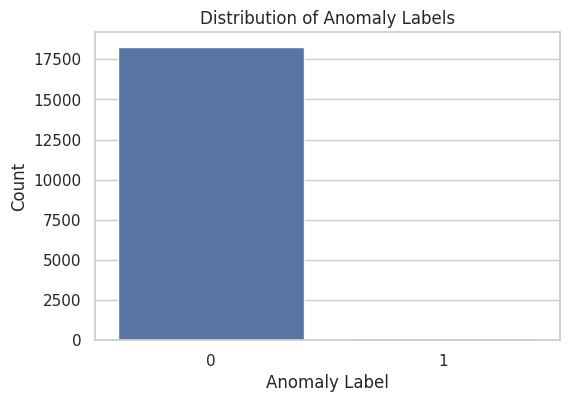

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of the 'y' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='deep',color='green')
plt.title('Distribution of Anomaly Labels')
plt.xlabel('Anomaly Label')
plt.ylabel('Count')
plt.show()





Let's start by visualizing the distribution of the 'y' variable to understand the imbalance in the dataset.

The count plot for the 'y' variable shows a significant imbalance between the number of anomalies (label '1') and normal observations (label '0'). This is typical in anomaly detection scenarios where anomalies are rare events compared to normal operations.


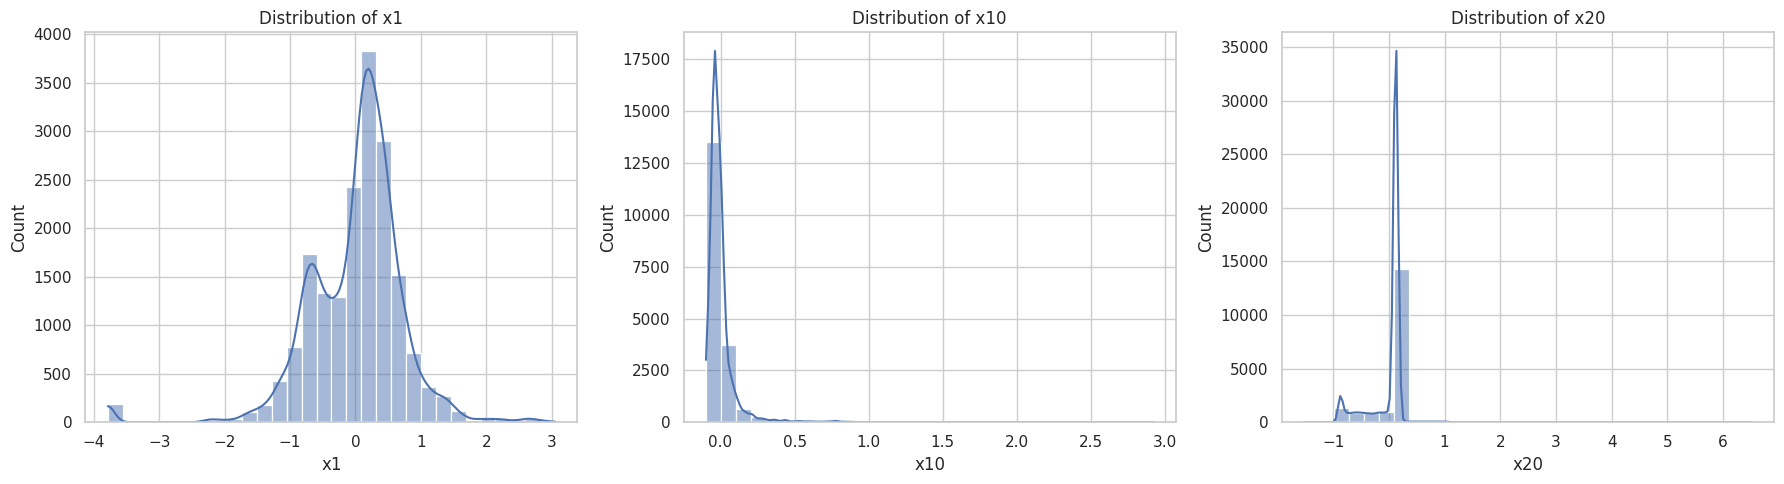

In [13]:
# Plotting histograms for a selection of predictor variables
plt.figure(figsize=(18, 5))

# Histogram for x1
plt.subplot(1, 3, 1)
sns.histplot(df['x1'], kde=True, bins=30)
plt.title('Distribution of x1')

# Histogram for x10
plt.subplot(1, 3, 2)
sns.histplot(df['x10'], kde=True, bins=30)
plt.title('Distribution of x10')

# Histogram for x20
plt.subplot(1, 3, 3)
sns.histplot(df['x20'], kde=True, bins=30)
plt.title('Distribution of x20')

plt.tight_layout()
plt.show()

The histograms for the selected predictor variables (x1, x10, x20) show diverse distributions:

- **x1**: Appears to be somewhat normally distributed with a slight skewness, centered around a mean near zero.
- **x10**: Shows a bi-modal distribution, suggesting two distinct groups within this predictor.
- **x20**: Appears to have a skewed distribution with a peak near zero and a long tail.

These distributions highlight the variety in the data features, suggesting that different variables might require different preprocessing approaches to normalize their distributions for modeling.


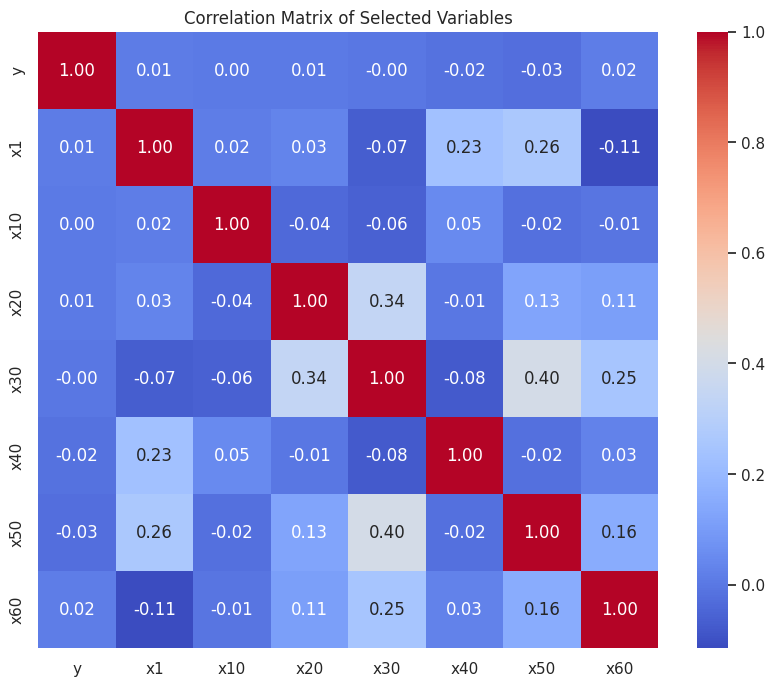

In [14]:
# Selecting a subset of variables for correlation analysis
subset_data = df[['y', 'x1', 'x10', 'x20', 'x30', 'x40', 'x50', 'x60']]

# Calculating the correlation matrix
correlation_matrix = subset_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()



The correlation matrix for the selected variables, including the 'y' variable, provides the following insights:

- Most predictor variables (x1, x10, x20, x30, x40, x50, x60) show low to moderate correlations with each other, indicating that there might not be strong linear relationships between them. This is common in datasets where variables capture different aspects of the system's behavior.

- The 'y' variable, which denotes anomalies, also shows low correlations with the selected predictors, suggesting that predicting anomalies may not rely solely on linear relationships. This underscores the complexity of anomaly detection tasks, where patterns indicating anomalies might be subtle or involve interactions between multiple variables.

These insights from descriptive statistics and visualizations form a basis for the next steps in data cleaning, feature engineering, and model selection, where the goal will be to address the identified challenges and leverage the patterns in the data for effective anomaly detection.

In [15]:
# Correcting the datetime conversion using the 'month/day/year' format
df['time'] = pd.to_datetime(df['time'], format='%m/%d/%Y %H:%M:%S')

# Verify the conversion
df['time'].dtype


dtype('<M8[ns]')

The 'time' column has been successfully converted to datetime format, as indicated by the dtype '<M8[ns]', which is a datetime64 representation in NumPy.

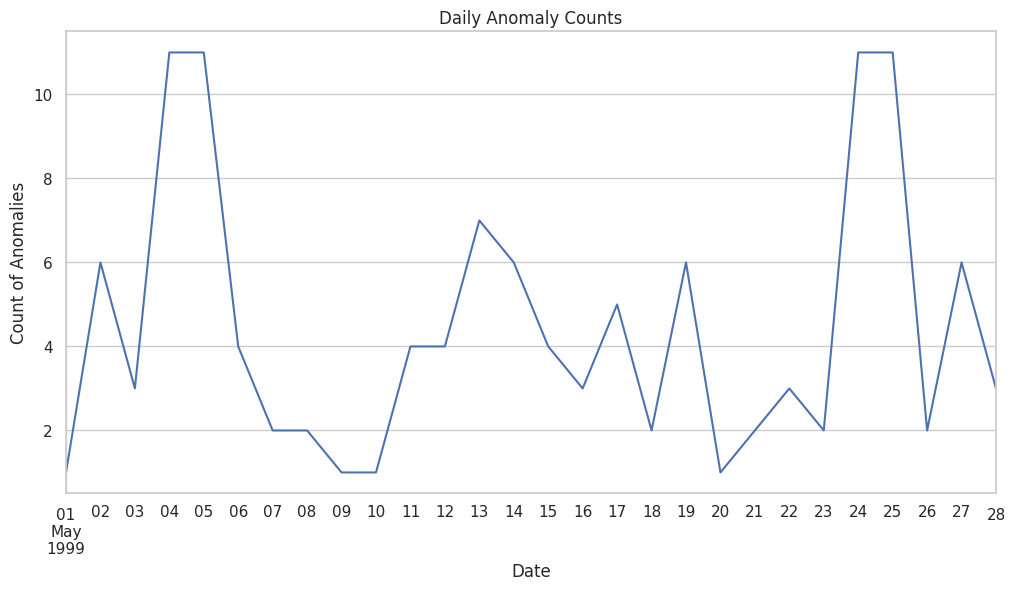

In [16]:
# Filtering the data for anomalies
anomalies = df[df['y'] == 1]

# Resampling to daily counts
daily_anomalies = anomalies.resample('D', on='time').count()['y']

# Plotting the daily anomaly counts
plt.figure(figsize=(12, 6))
daily_anomalies.plot()
plt.title('Daily Anomaly Counts')
plt.xlabel('Date')
plt.ylabel('Count of Anomalies')
plt.show()


The time series plot of daily anomaly counts shows the distribution of anomalies over the observed period. While most days have few or no anomalies, there are specific instances where the count of anomalies spikes, indicating periods of increased anomaly occurrence. These spikes could correspond to specific events or changes in the system being monitored.

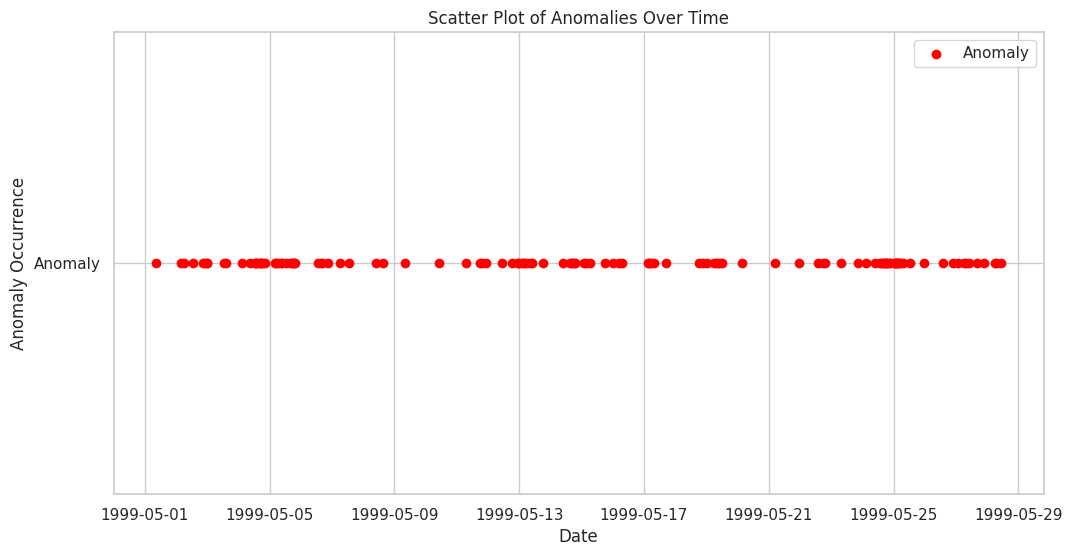

In [17]:
# Plotting each anomaly as a point over time
plt.figure(figsize=(12, 6))
plt.scatter(anomalies['time'], anomalies['y'], color='red', label='Anomaly')
plt.title('Scatter Plot of Anomalies Over Time')
plt.xlabel('Date')
plt.ylabel('Anomaly Occurrence')
plt.yticks([1], ['Anomaly'])  # Setting the y-ticks to only show 'Anomaly'
plt.legend()
plt.show()


The scatter plot provides a detailed view of each anomaly's occurrence over time. Each red dot represents an anomaly on the corresponding date. This visualization helps in identifying patterns or specific time periods with a high frequency of anomalies, which could be crucial for further investigation or for understanding the underlying causes of these anomalies.

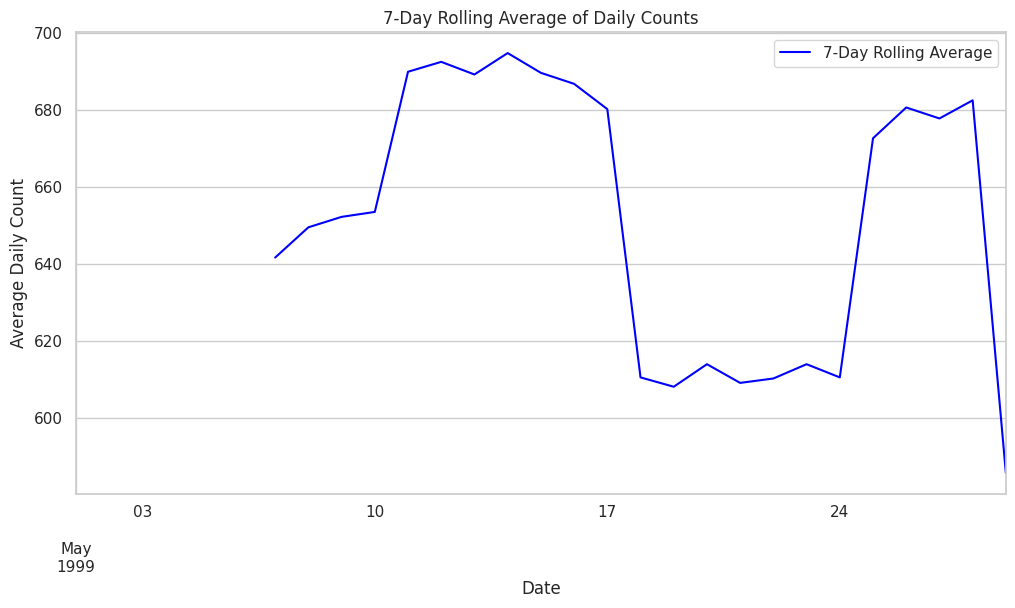

In [18]:
# Rolling Average Plot
# Calculating the daily counts of all records, not just anomalies
daily_counts = df.resample('D', on='time').count()['y']

# Calculating the 7-day rolling average
rolling_average = daily_counts.rolling(window=7).mean()

# Plotting the rolling average
plt.figure(figsize=(12, 6))
rolling_average.plot(color='blue', label='7-Day Rolling Average')
plt.title('7-Day Rolling Average of Daily Counts')
plt.xlabel('Date')
plt.ylabel('Average Daily Count')
plt.legend()
plt.show()


The 7-Day Rolling Average plot of daily counts (including both normal instances and anomalies) provides a smoothed view of the data, highlighting longer-term trends and patterns. The rolling average helps to mitigate the impact of daily fluctuations, making it easier to observe periods of increased or decreased activity over time.

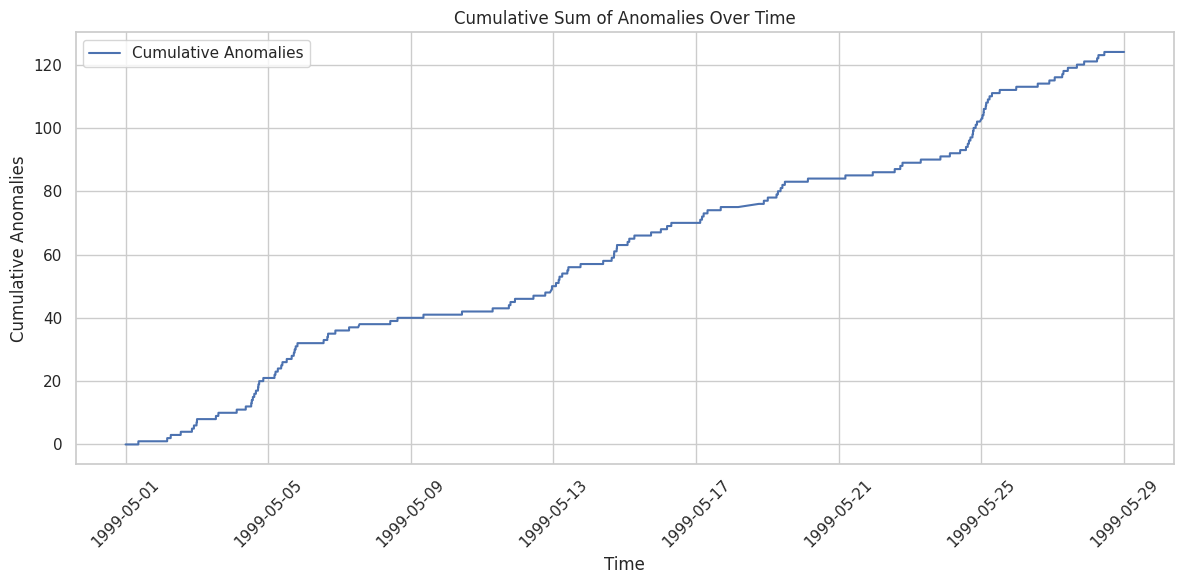

In [19]:
# Cumulative Sum Plot
import matplotlib.pyplot as plt

# Convert 'time' column to datetime format for plotting
df['time'] = pd.to_datetime(df['time'])

# Calculate the cumulative sum of anomalies
df['cumulative_anomalies'] = df['y'].cumsum()

# Plotting Cumulative Sum of Anomalies over Time
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['cumulative_anomalies'], label='Cumulative Anomalies')
plt.title('Cumulative Sum of Anomalies Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Anomalies')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
!pip install statsmodels

The Cumulative Sum Plot above shows how the anomalies accumulate over time in the dataset.

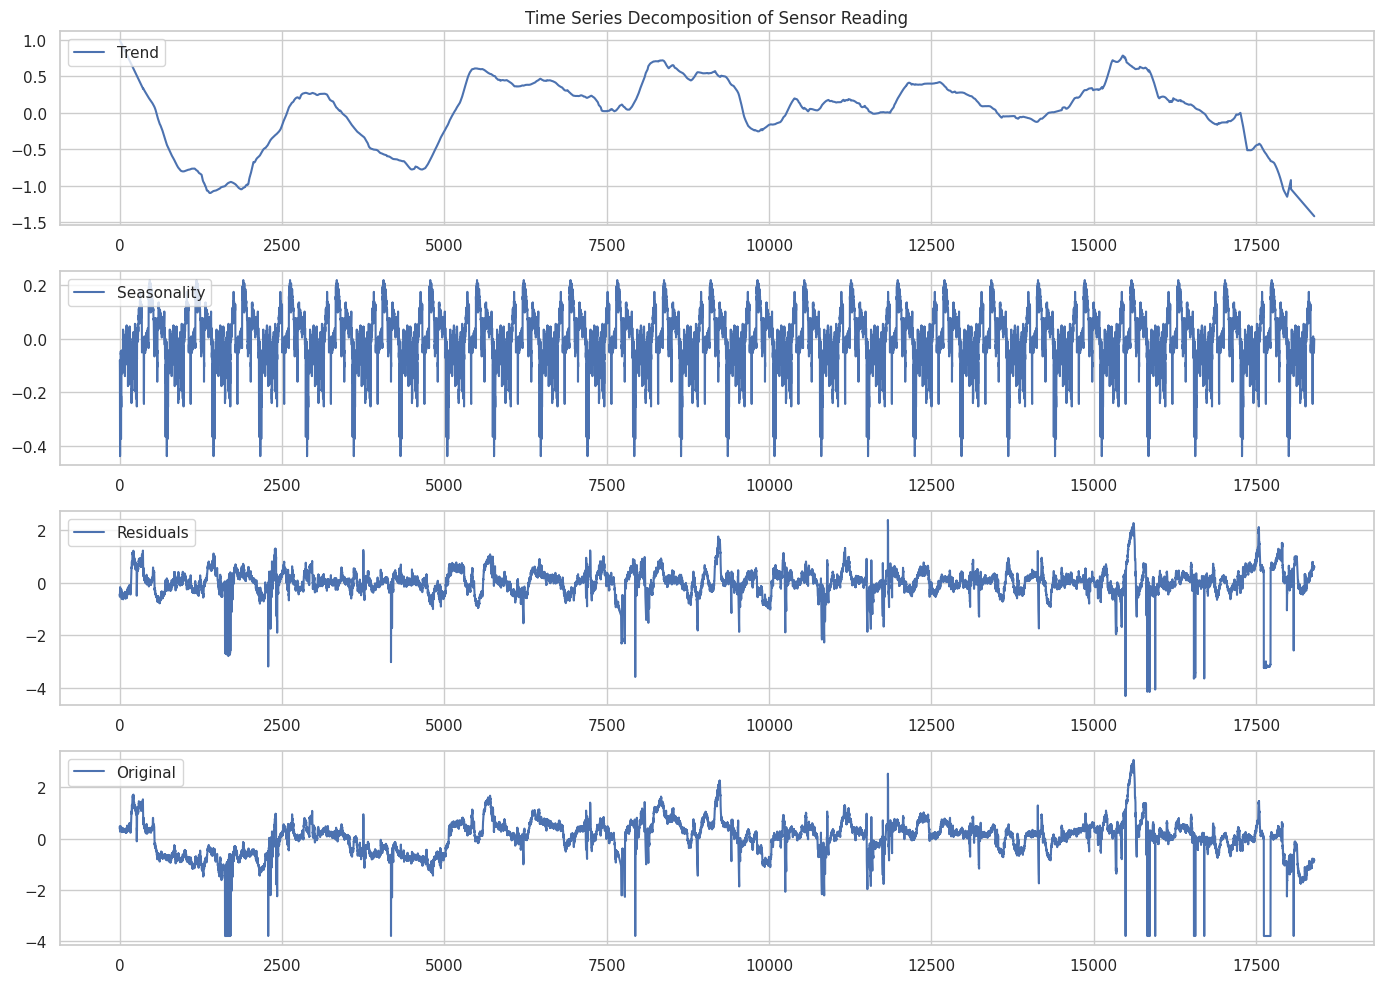

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Choose a sensor reading for decomposition (e.g., 'x1')
sensor_reading = 'x1'

# Setting the frequency of the time series (assuming each entry is 2 minutes apart)
# This is a simplification; for more accurate decomposition, the exact frequency should be determined based on the data
frequency = int(24 * 60 / 2)  # daily frequency, assuming data points are every 2 minutes

# Decompose the time series
decomposition = seasonal_decompose(df[sensor_reading], model='additive', period=frequency, extrapolate_trend='freq')

# Plotting the decomposed components
plt.figure(figsize=(14, 10))

# Trend component
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Time Series Decomposition of Sensor Reading')

# Seasonal component
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

# Residual component
plt.subplot(413)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

# Original Data
plt.subplot(414)
plt.plot(df[sensor_reading], label='Original')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


The Time Series Decomposition Plot above decomposes the selected sensor reading (x1) into its trend, seasonal, and residual components, providing insights into the underlying patterns of the data.

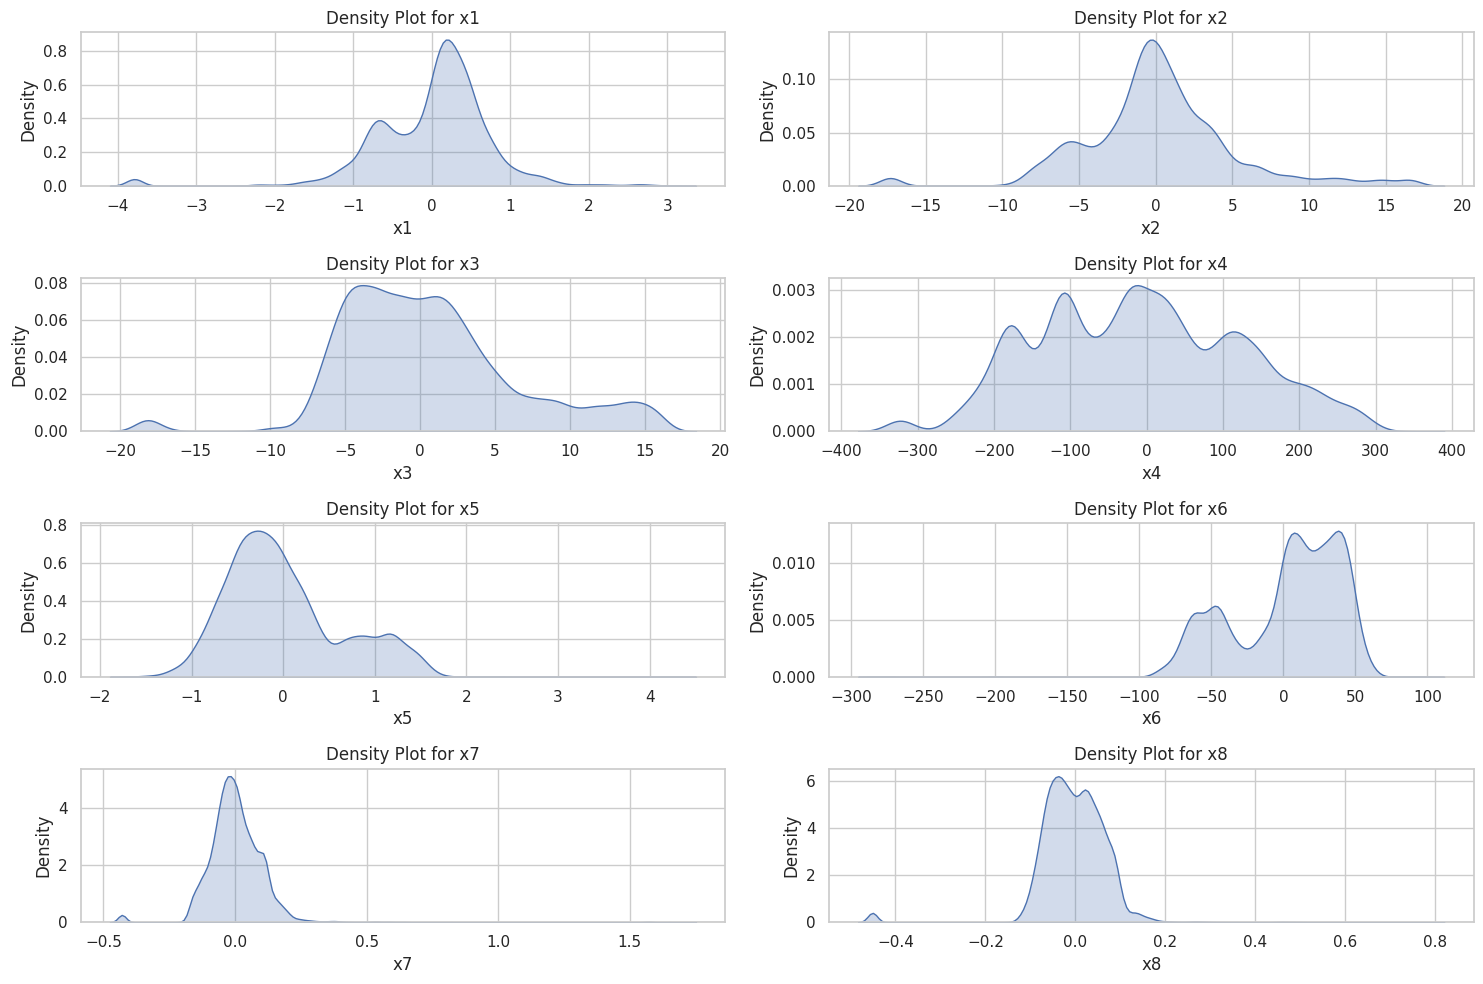

In [22]:
# Selecting a subset of columns for density plots to avoid overcrowding the output
columns_to_plot = df.columns[2:10]  # Selecting 'x1' to 'x8' as an example

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.kdeplot(df[column], fill=True)
    plt.title(f'Density Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [23]:
!pip install plotly

In [24]:
import plotly.express as px

# Plotting the pie plot
fig = px.pie(df, names='y', title='Pie Plot of Anomaly Labels')
fig.show()


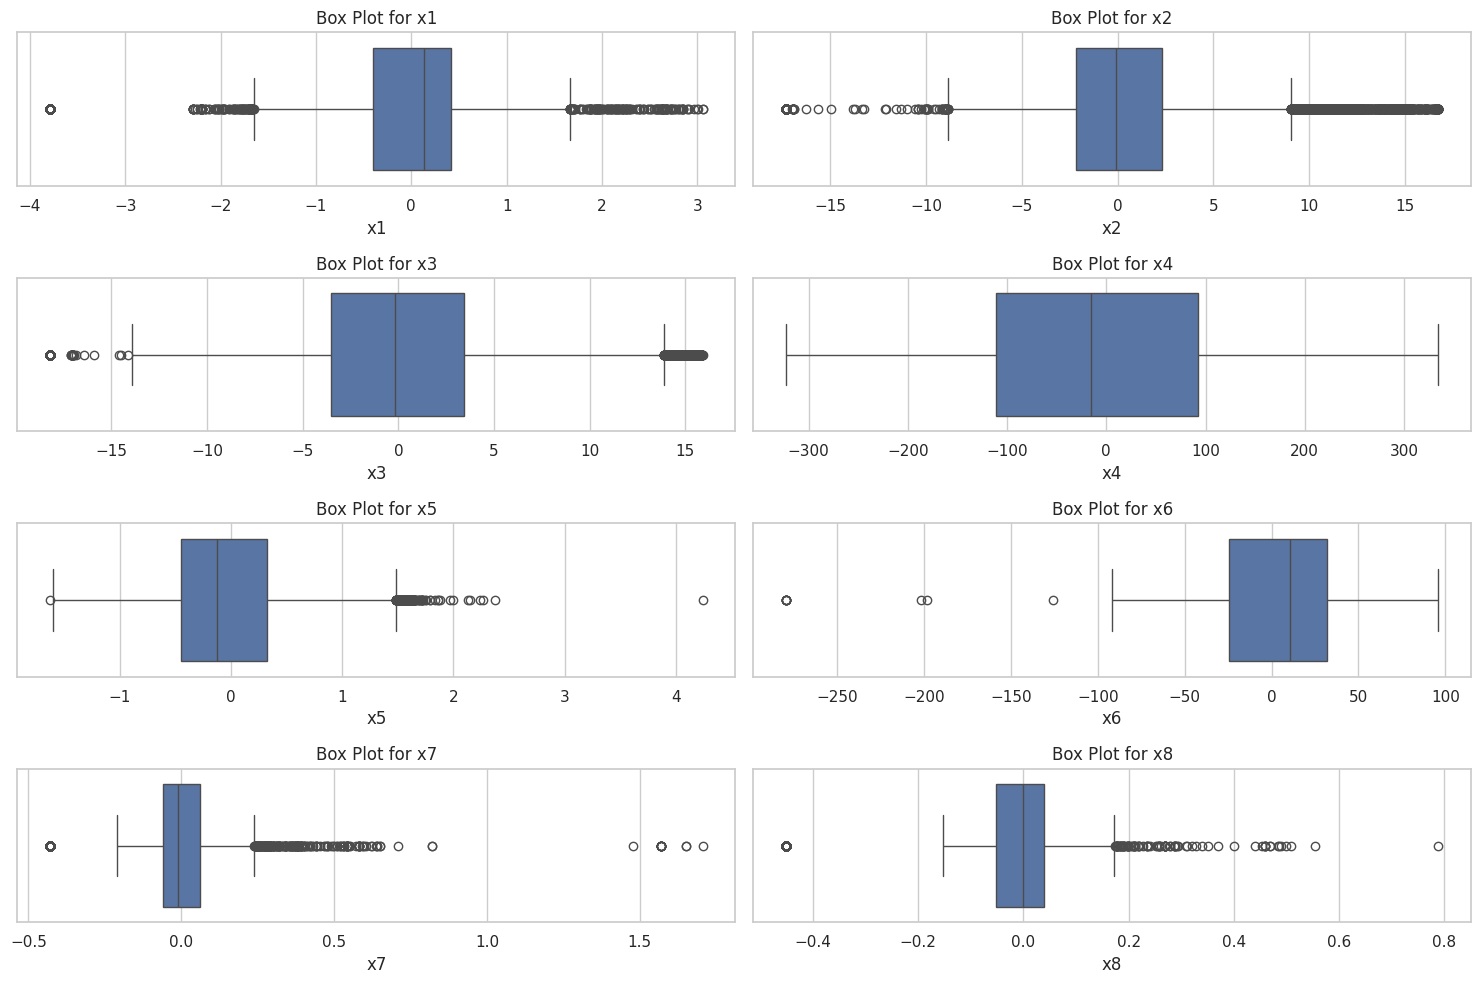

In [25]:
# Plotting box plots for a subset of sensor readings to identify outliers
columns_to_plot = df.columns[2:10]  # Selecting 'x1' to 'x8' as an example

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()


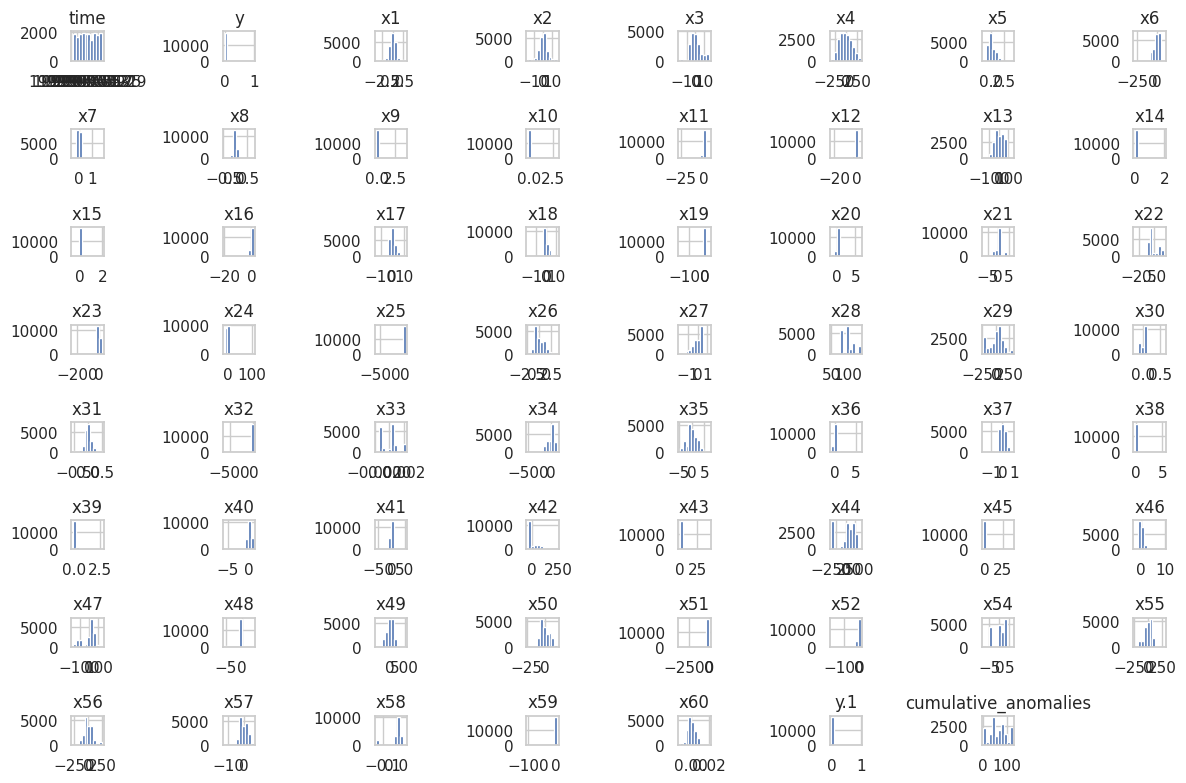

In [26]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


In [27]:
import plotly.express as px

# Selecting a subset of the data for plotting to ensure the plot is not too crowded
subset_data = df.iloc[::10, :]  # Taking every 10th row as a sample

# Plotting x1 vs x2 using Plotly
fig1 = px.scatter(subset_data, x='x1', y='x2', title='Scatter Plot of Sensor Reading x1 vs x2')
fig1.show()

# Plotting x3 vs x4 using Plotly
fig2 = px.scatter(subset_data, x='x3', y='x4', title='Scatter Plot of Sensor Reading x3 vs x4')
fig2.show()


In [28]:
# correlation matrix of the entire dataset
df.corr()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x54,x55,x56,x57,x58,x59,x60,y.1,cumulative_anomalies
time,1.000000,0.000741,0.094710,0.143395,-0.120243,0.425349,0.437453,0.222518,-0.118227,0.325096,...,-0.334488,0.215450,0.320491,-0.265503,-0.401512,-0.221929,-0.116790,-0.615400,-0.001511,0.991633
y,0.000741,1.000000,0.010227,-0.090961,-0.116369,0.016792,-0.006161,-0.033487,0.018346,0.002983,...,-0.041135,-0.041177,-0.013450,-0.024917,-0.017802,0.005083,0.009165,0.016083,0.390321,0.001872
x1,0.094710,0.010227,1.000000,0.137199,-0.057523,0.061614,0.046796,-0.120384,0.260254,0.337250,...,0.270655,-0.304403,0.037154,0.089789,0.323856,0.014921,0.472180,-0.114438,0.004664,0.085431
x2,0.143395,-0.090961,0.137199,1.000000,0.180331,-0.137783,0.035360,-0.029706,-0.058053,0.383303,...,0.111428,0.213488,0.300021,0.157117,0.007790,0.214721,0.341174,-0.129893,-0.061108,0.174234
x3,-0.120243,-0.116369,-0.057523,0.180331,1.000000,-0.273556,-0.187914,0.011737,0.277747,0.203604,...,-0.064739,0.514714,-0.015091,-0.014670,-0.057484,-0.406268,0.329741,0.113311,-0.059705,-0.090229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x58,-0.221929,0.005083,0.014921,0.214721,-0.406268,-0.110220,0.050484,-0.204748,-0.323613,-0.133213,...,0.102886,-0.272504,-0.106123,0.149248,0.014729,1.000000,-0.010551,0.108695,-0.018811,-0.229061
x59,-0.116790,0.009165,0.472180,0.341174,0.329741,-0.006763,-0.001526,-0.085573,0.377601,0.565666,...,0.068729,-0.057957,-0.041676,-0.024358,0.073985,-0.010551,1.000000,0.101891,0.004727,-0.125565
x60,-0.615400,0.016083,-0.114438,-0.129893,0.113311,-0.295451,-0.040054,-0.332208,0.165239,-0.135426,...,0.049387,-0.106632,-0.182684,-0.107046,0.106532,0.108695,0.101891,1.000000,0.012547,-0.631994
y.1,-0.001511,0.390321,0.004664,-0.061108,-0.059705,-0.007333,0.015751,-0.036955,0.032053,0.022360,...,-0.063746,-0.018056,0.002049,-0.026440,-0.013197,-0.018811,0.004727,0.012547,1.000000,-0.002466


In [29]:
# plot the correlation matrix for enteire dataset using plotly
fig = px.imshow(df.corr(), title='Correlation Matrix of the Entire Dataset')
fig.show()

In [30]:
# sort the column names based on the correlation with the target variable

correlation_with_target = df.corr()['y'].sort_values(ascending=False)
correlation_with_target

y      1.000000
y.1    0.390321
x15    0.058647
x42    0.034149
x9     0.024217
         ...   
x17   -0.043873
x18   -0.056908
x2    -0.090961
x3    -0.116369
x19   -0.140868
Name: y, Length: 63, dtype: float64

# **Data Cleaning**

In [31]:
# checking of missing values
df.isnull().sum()


time                    0
y                       0
x1                      0
x2                      0
x3                      0
                       ..
x58                     0
x59                     0
x60                     0
y.1                     0
cumulative_anomalies    0
Length: 63, dtype: int64

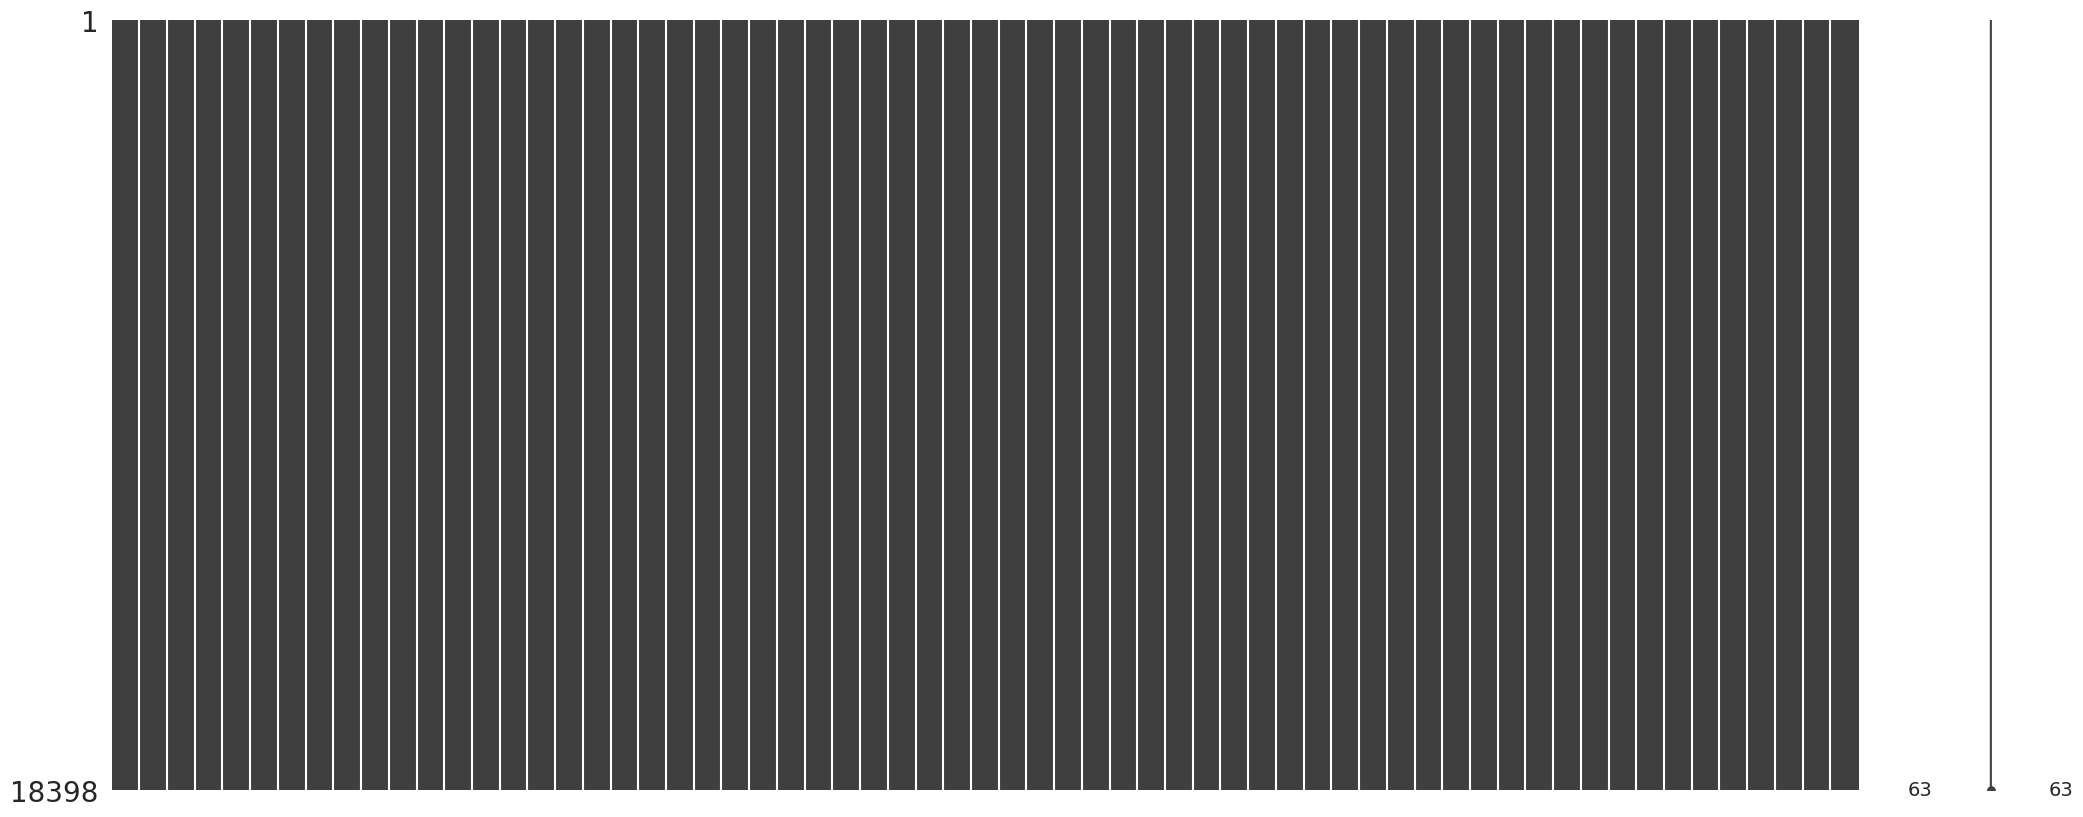

In [32]:
# plot the missing values using missingno library
import missingno as msno
msno.matrix(df)
plt.show()

In [33]:
# droping the time column
df = df.drop('time', axis=1)

In [34]:
# droping the y.1 column
df = df.drop('y.1', axis=1)

In [35]:
# printnig the shape of the dataset
df.shape

(18398, 61)

##Your focus in this exercise should be on the following:

The following is recommendation of the steps that should be employed towards attempting to solve this problem statement:

Exploratory Data Analysis: Analyze and understand the data to identify patterns, relationships, and trends in the data by using Descriptive Statistics and Visualizations.

Data Cleaning: This might include standardization, handling the missing values and outliers in the data.

Feature Engineering: Create new features or transform the existing features for better performance of the ML Models.

Model Selection: Choose the most appropriate model that can be used for this project.

Model Training: Split the data into train & test sets and use the train set to estimate the best model parameters.

Model Validation: Evaluate the performance of the model on data that was not used during the training process. The goal is to estimate the model's ability to generalize to new, unseen data and to identify any issues with the model, such as overfitting.

Model Deployment: Model deployment is the process of making a trained machine learning model available for use in a production environment

In [36]:
from sklearn.preprocessing import StandardScaler


# Separating features and target
features = df.drop('y', axis=1)
target = df['y']

# Standardizing the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Creating a new DataFrame for the standardized features, preserving column names
features_standardized_df = pd.DataFrame(features_standardized, columns=features.columns)

# Displaying the first few rows of the standardized features
features_standardized_df.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,cumulative_anomalies
0,0.491135,-0.962506,-0.785758,0.179012,-0.197698,-0.621443,-0.008403,-0.755236,-0.364704,-0.334939,...,0.095742,1.563441,-1.686831,-0.396964,0.114191,1.392446,0.724493,0.097629,1.020509,-1.779591
1,0.624478,-0.951588,-0.772721,0.199870,-0.213317,-0.569916,-0.008403,-0.755236,-0.364704,-0.334939,...,0.095742,1.564109,-1.687077,-0.512114,0.166418,1.052719,0.726381,0.110838,1.021992,-1.779591
2,0.473881,-0.979705,-0.829111,0.183823,-0.228936,-0.545082,0.084105,-0.755236,-0.173032,-0.148717,...,0.095742,1.564816,-1.687323,-0.538174,0.218645,1.419989,0.728290,0.183000,1.023475,-1.779591
3,0.390072,-0.995403,-0.773606,0.176447,-0.243928,-0.563435,0.003933,-0.755236,-0.108492,-0.054165,...,0.095742,1.565524,-1.687569,-0.564234,0.153036,1.612792,0.730178,0.251727,1.024957,-1.779591
4,0.341594,-0.993580,-0.825743,0.192518,-0.255240,-0.536168,-0.008403,-0.755236,-0.173032,-0.054165,...,0.095742,1.566231,-1.687815,-0.590295,0.155925,1.447532,0.731327,0.141624,1.026652,-1.779591


In [37]:
# now adding the y column form df data frame to the features_standardized_df and name it as df
df = pd.concat([features_standardized_df, target], axis=1)

# Displaying the first few rows of the new DataFrame
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x52,x54,x55,x56,x57,x58,x59,x60,cumulative_anomalies,y
0,0.491135,-0.962506,-0.785758,0.179012,-0.197698,-0.621443,-0.008403,-0.755236,-0.364704,-0.334939,...,1.563441,-1.686831,-0.396964,0.114191,1.392446,0.724493,0.097629,1.020509,-1.779591,0
1,0.624478,-0.951588,-0.772721,0.199870,-0.213317,-0.569916,-0.008403,-0.755236,-0.364704,-0.334939,...,1.564109,-1.687077,-0.512114,0.166418,1.052719,0.726381,0.110838,1.021992,-1.779591,0
2,0.473881,-0.979705,-0.829111,0.183823,-0.228936,-0.545082,0.084105,-0.755236,-0.173032,-0.148717,...,1.564816,-1.687323,-0.538174,0.218645,1.419989,0.728290,0.183000,1.023475,-1.779591,0
3,0.390072,-0.995403,-0.773606,0.176447,-0.243928,-0.563435,0.003933,-0.755236,-0.108492,-0.054165,...,1.565524,-1.687569,-0.564234,0.153036,1.612792,0.730178,0.251727,1.024957,-1.779591,0
4,0.341594,-0.993580,-0.825743,0.192518,-0.255240,-0.536168,-0.008403,-0.755236,-0.173032,-0.054165,...,1.566231,-1.687815,-0.590295,0.155925,1.447532,0.731327,0.141624,1.026652,-1.779591,0


In [38]:
# Statistical summary of the standardized features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,18398.0,2.471722e-17,1.000027,-5.114191,-0.562027,0.156722,0.551115,4.095459
x2,18398.0,-2.471722e-17,1.000027,-3.537622,-0.468906,-0.047269,0.437545,3.357362
x3,18398.0,1.853791e-17,1.000027,-3.161152,-0.691653,-0.128007,0.480363,2.582243
x4,18398.0,-3.707582e-17,1.000027,-2.387414,-0.774021,-0.037573,0.779649,2.630329
x5,18398.0,-5.406891e-18,1.000027,-2.571626,-0.714951,-0.200718,0.502548,6.676061
...,...,...,...,...,...,...,...,...
x58,18398.0,-3.089652e-17,1.000027,-3.035643,0.047830,0.302664,0.468946,1.418204
x59,18398.0,-1.235861e-17,1.000027,-9.693178,0.034304,0.076595,0.127771,0.677998
x60,18398.0,-2.471722e-17,1.000027,-2.856790,-0.648760,-0.116099,0.599259,4.077871
cumulative_anomalies,18398.0,7.415165e-17,1.000027,-1.779591,-0.683781,0.008310,0.700401,1.796212


# **Feature Engineering**

In [39]:
# df.to_csv('AnomaData.csv', index=False)

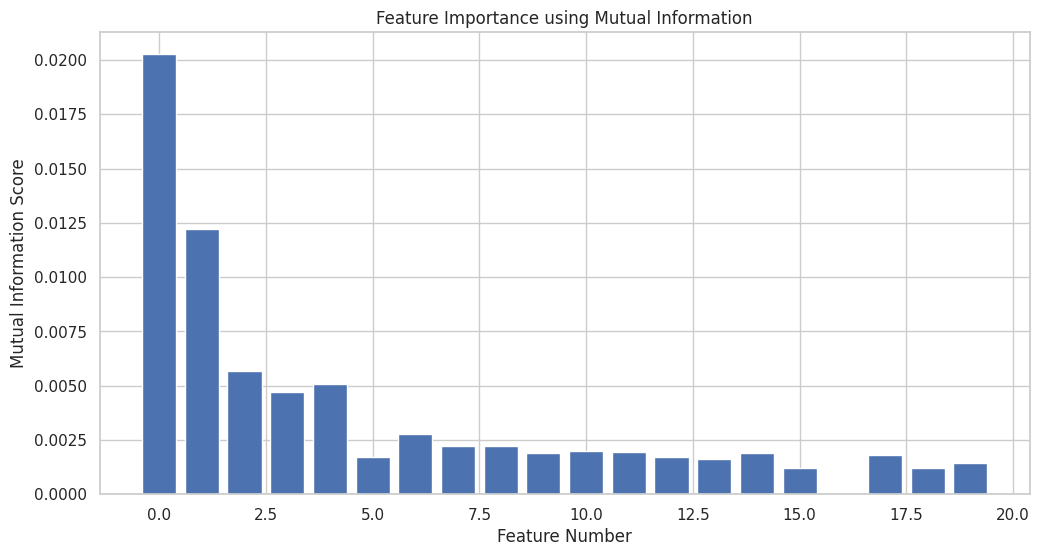

<bound method IndexOpsMixin.tolist of Index(['x3', 'x2', 'x19', 'x18', 'x17', 'x10', 'x39', 'x48', 'x38', 'x9',
       'x11', 'x24', 'x60', 'x55', 'x25', 'x22', 'x28', 'x15', 'x16'],
      dtype='object')>

In [128]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt

# Separate the features and the target variable
X = df.drop('y', axis=1)
y = df['y']

# Apply SelectKBest with mutual information as the score function
k_best = SelectKBest(mutual_info_classif, k='all')  # k='all' to select all features and evaluate their importance
k_best.fit(X, y)

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), k_best.scores_)
plt.xlabel('Feature Number')
plt.ylabel('Mutual Information Score')
plt.title('Feature Importance using Mutual Information')
plt.show()

# Print the names of important columns based on mutual information score
important_features = X.columns[k_best.scores_ > 0]
important_features.tolist


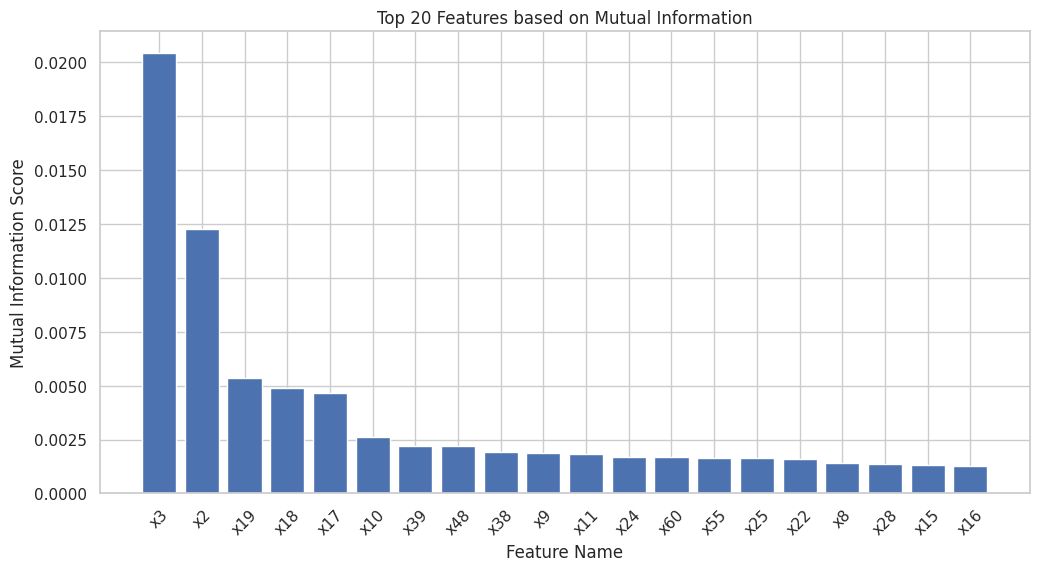

['x3',
 'x2',
 'x19',
 'x18',
 'x17',
 'x10',
 'x39',
 'x48',
 'x38',
 'x9',
 'x11',
 'x24',
 'x60',
 'x55',
 'x25',
 'x22',
 'x8',
 'x28',
 'x15',
 'x16']

In [41]:
# Select top 20 features based on mutual information score
top_k = 20
top_features_indices = k_best.scores_.argsort()[-top_k:][::-1]  # Get indices of top 20 features
top_features_scores = k_best.scores_[top_features_indices]
top_features_names = X.columns[top_features_indices]

# Plot the top 20 feature importance
plt.figure(figsize=(12, 6))
plt.bar(top_features_names, top_features_scores)
plt.xticks(rotation=45)
plt.xlabel('Feature Name')
plt.ylabel('Mutual Information Score')
plt.title('Top 20 Features based on Mutual Information')
plt.show()

top_features_names.tolist()


In [42]:
# creating the data frame with the top 20 features
df = df[top_features_names.tolist() + ['y']]

In [43]:
# Displaying the first few rows of the new DataFrame
df.head()

,x3,x2,x19,x18,x17,x10,x39,x48,x38,x9,...,x24,x60,x55,x25,x22,x8,x28,x15,x16,y
0,-0.785758,-0.962506,0.533521,-0.538854,-1.147266,-0.334939,-0.560808,0.074906,-0.335835,-0.364704,...,0.158269,1.020509,-0.396964,0.254106,-0.641770,-0.755236,-0.234765,1.027143,0.120785,0
1,-0.772721,-0.951588,0.533521,-0.536711,-1.153453,-0.334939,-0.449371,0.075169,-0.270002,-0.364704,...,0.159156,1.021992,-0.512114,0.264948,-0.646753,-0.755236,-0.234765,1.018233,0.166598,0
2,-0.829111,-0.979705,0.533521,-0.534569,-1.159641,-0.148717,-0.392789,0.075433,-0.218667,-0.173032,...,0.160042,1.023475,-0.538174,0.256280,-0.651737,-0.755236,-0.234765,1.009348,0.144013,0
3,-0.773606,-0.995403,0.533521,-0.532426,-1.165829,-0.054165,-0.336214,0.075697,-0.210385,-0.108492,...,0.160929,1.024957,-0.564234,0.250194,-0.656722,-0.755236,-0.234765,1.000438,0.065048,0
4,-0.825743,-0.993580,0.533521,-0.530282,-1.172017,-0.054165,-0.336214,0.075960,-0.260063,-0.173032,...,0.161817,1.026652,-0.590295,0.250151,-0.661705,-0.755236,-0.234765,0.991553,0.108118,0


In [44]:
df.to_csv('final_data.csv', index=False)

# **Data Splitting and Balancing using SMOTE**

In [45]:
# Splitting the dataset into the Training set and Test set

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14718, 20), (3680, 20), (14718,), (3680,))

The data has been successfully split into training and testing sets with an 80-20 ratio. Here are the shapes of the resulting datasets:

- Training features (X_train): 14,718 records with 20 features each
- Testing features (X_test): 3,680 records with 20 features each
- Training target (y_train): 14,718 records
- Testing target (y_test): 3,680 records

This confirms that the split was conducted as requested, with 80% of the data used for training and 20% for testing, using a random state of 42 to ensure reproducibility.

## **SMOTE**

In [46]:
from imblearn.over_sampling import SMOTE
import plotly.graph_objects as go

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Count the class distribution before and after SMOTE
class_distribution_before = y_train.value_counts()
class_distribution_after = y_train_smote.value_counts()

# Print class distribution before and after SMOTE
print("Class distribution before SMOTE:\n", class_distribution_before)
print("\nClass distribution after SMOTE:\n", class_distribution_after)

Class distribution before SMOTE:
 y
0    14616
1      102
Name: count, dtype: int64

Class distribution after SMOTE:
 y
0    14616
1    14616
Name: count, dtype: int64


In [47]:
from imblearn.over_sampling import SMOTE
import plotly.graph_objects as go

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Count the class distribution before and after SMOTE
class_distribution_before = y_train.value_counts()
class_distribution_after = y_train_smote.value_counts()

# Plot the class distribution before SMOTE using a pie chart
fig_before = go.Figure(data=[go.Pie(labels=class_distribution_before.index, values=class_distribution_before.values)])
fig_before.update_layout(title_text="Class Distribution Before SMOTE")
fig_before.show()

# Plot the class distribution after SMOTE using a pie chart
fig_after = go.Figure(data=[go.Pie(labels=class_distribution_after.index, values=class_distribution_after.values)])
fig_after.update_layout(title_text="Class Distribution After SMOTE")
fig_after.show()


The class distribution before applying SMOTE shows a significant imbalance between the two classes in your dataset:

- Class 0: 14,616 instances
- Class 1: 102 instances

This indicates that the dataset is highly imbalanced, with the majority class (Class 0) vastly outnumbering the minority class (Class 1). In practical terms, this could lead to a machine learning model that is biased towards predicting the majority class, as it has been exposed to many more examples of this class during training. The model might perform well in terms of overall accuracy simply by predicting the majority class most of the time, but it would likely perform poorly in correctly identifying instances of the minority class, which could be critical in many applications such as fraud detection, medical diagnosis, etc.

After applying the Synthetic Minority Over-sampling Technique (SMOTE), the class distribution is perfectly balanced:

- Class 0: 14,616 instances
- Class 1: 14,616 instances

SMOTE has created synthetic samples of the minority class (Class 1) to match the number of instances in the majority class (Class 0), leading to a balanced dataset. This balancing act is crucial for improving the performance of machine learning models on imbalanced datasets by providing an equal representation of classes during training. As a result, the model is less likely to be biased towards the majority class and can potentially achieve better generalization, particularly in identifying instances of the previously under-represented class.

It's important to note, however, that while SMOTE can help balance class distribution and potentially improve model performance on imbalanced datasets, it also introduces synthetic data that may not perfectly represent the true underlying distribution of the minority class. Therefore, it's essential to carefully evaluate the model's performance using appropriate metrics (such as precision, recall, F1-score, and ROC-AUC for classification tasks) and consider domain-specific implications of false positives and false negatives.

# **Model selection**

Choosing the right model for your project depends on various factors including the nature of your data, the problem you're solving, the computational resources available, and the interpretability requirements. Given the data preprocessing steps you've undertaken, including feature selection with mutual information and balancing the dataset with SMOTE, it sounds like you're dealing with a classification problem, potentially with a binary outcome (given the two classes in your dataset).

Here are a few models that are commonly used for classification tasks, along with reasons why you might choose each:

1. **Logistic Regression:**
   - **Why:** It's a simple, fast, and interpretable model that's particularly useful for binary classification. Logistic regression can serve as a good baseline model to understand the influence of individual features on the outcome.
   - **Considerations:** It assumes a linear relationship between the features and the log odds of the outcome, which might not hold true for all datasets.

2. **Random Forest:**
   - **Why:** An ensemble method that is effective for classification tasks, capable of handling non-linear data, and provides importance scores for each feature, aiding interpretability. It's robust against overfitting, especially with high-dimensional data.
   - **Considerations:** More computationally intensive than logistic regression and the model can become complex, making it harder to interpret than simpler models.

3. **Gradient Boosting Machines (GBM), e.g., XGBoost, LightGBM, CatBoost:**
   - **Why:** These are powerful ensemble learning methods that build trees in a sequential manner, where each tree attempts to correct the errors of the previous ones. They often achieve superior performance in classification tasks and can handle various types of data, including imbalanced datasets.
   - **Considerations:** Can be computationally intensive and prone to overfitting if not carefully tuned. They can also be less interpretable due to their complexity.


**Recommendation:**
Given the preprocessing steps you've applied, it seems you're dealing with a potentially complex classification problem, possibly with non-linear relationships. Starting with a model like **Random Forest** could be beneficial due to its robustness, ability to handle imbalance (even though you've applied SMOTE), and feature importance insights. It's also relatively easier to tune compared to GBM or neural networks.

After establishing a baseline with Random Forest, we could experiment with **Gradient Boosting Machines (GBM)** like XGBoost or LightGBM to potentially improve performance. These models are known for their high accuracy in classification tasks and can handle the intricacies of your preprocessed data well.

It's crucial to evaluate each model not only based on accuracy but also considering metrics like precision, recall, F1-score, and AUC-ROC, especially since you're dealing with what was initially an imbalanced dataset. Cross-validation should also be used to ensure the model's generalizability.

# **Model Training and Evaluation**

## **Logistic Regression**

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

In [49]:
# Make predictions on the training and testing sets
y_train_pred = log_reg.predict(X_train_smote)
y_test_pred = log_reg.predict(X_test)

# Calculate evaluation metrics for both training and testing sets
training_accuracy = accuracy_score(y_train_smote, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

In [50]:
# Print the evaluation metrics
print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")

Training Accuracy: 0.8365
Testing Accuracy: 0.8307
Precision: 0.0238
Recall: 0.6818
F1 Score: 0.0459
AUC: 0.7567


In [51]:
import pandas as pd

# Creating a DataFrame to display the evaluation metrics in tabular format
metrics_data = {
    "Metric": ["Training Accuracy", "Testing Accuracy", "Precision", "Recall", "F1 Score", "AUC"],
    "Value": [training_accuracy, testing_accuracy, precision, recall, f1, roc_auc]
}

metrics_df = pd.DataFrame(metrics_data)

metrics_df


,Metric,Value
0,Training Accuracy,0.836481
1,Testing Accuracy,0.830707
2,Precision,0.023772
3,Recall,0.681818
4,F1 Score,0.045942
5,AUC,0.756710


In [52]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[3042  616]
 [   7   15]]


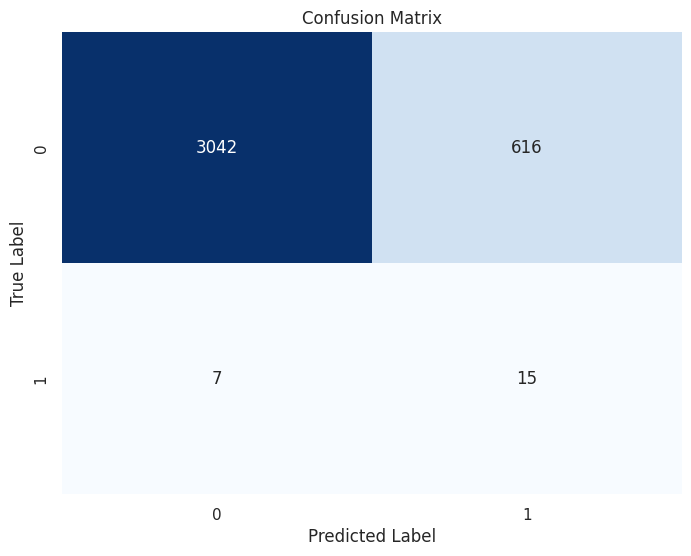

In [53]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

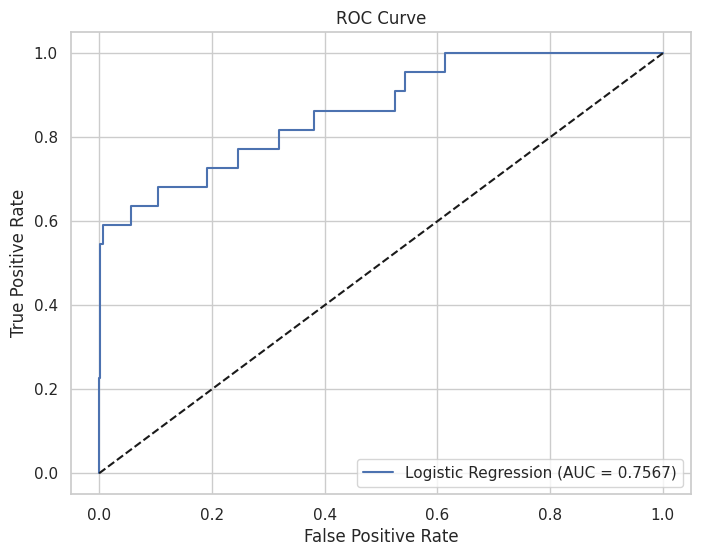

In [54]:
# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### **Model Tuning**

In [55]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works well with l1 and l2 penalties
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Extract the best estimator
best_log_reg = grid_search.best_estimator_

# Make predictions with the best model
y_train_pred_best = best_log_reg.predict(X_train_smote)
y_test_pred_best = best_log_reg.predict(X_test)


In [56]:
# Calculate evaluation metrics for the best model
training_accuracy_best = accuracy_score(y_train_smote, y_train_pred_best)
testing_accuracy_best = accuracy_score(y_test, y_test_pred_best)
precision_best = precision_score(y_test, y_test_pred_best)
recall_best = recall_score(y_test, y_test_pred_best)
f1_best = f1_score(y_test, y_test_pred_best)
roc_auc_best = roc_auc_score(y_test, y_test_pred_best)

# Print the evaluation metrics for the best model
print(f"Training Accuracy: {training_accuracy_best:.4f}")
print(f"Testing Accuracy: {testing_accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1 Score: {f1_best:.4f}")
print(f"AUC: {roc_auc_best:.4f}")


Training Accuracy: 0.8364
Testing Accuracy: 0.8313
Precision: 0.0238
Recall: 0.6818
F1 Score: 0.0461
AUC: 0.7570


In [57]:
# Confusion Matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_test_pred_best)
print("\nConfusion Matrix - Best Model:\n", conf_matrix_best)


Confusion Matrix - Best Model:
 [[3044  614]
 [   7   15]]


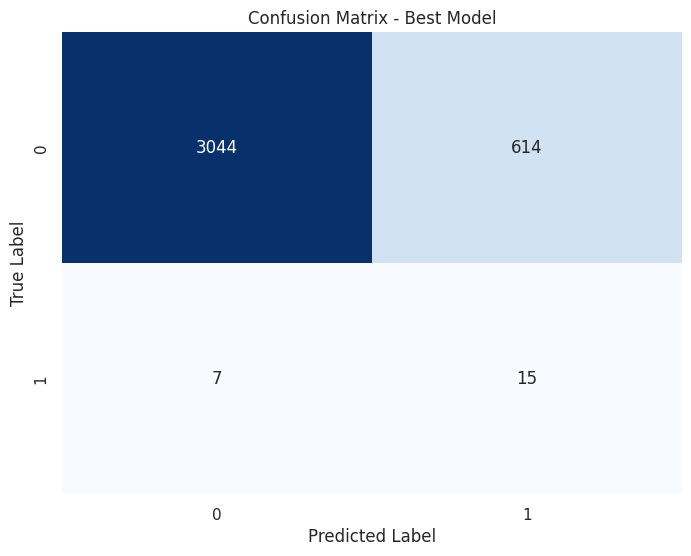

In [58]:
# Plotting the confusion matrix for the best model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Best Model')
plt.show()

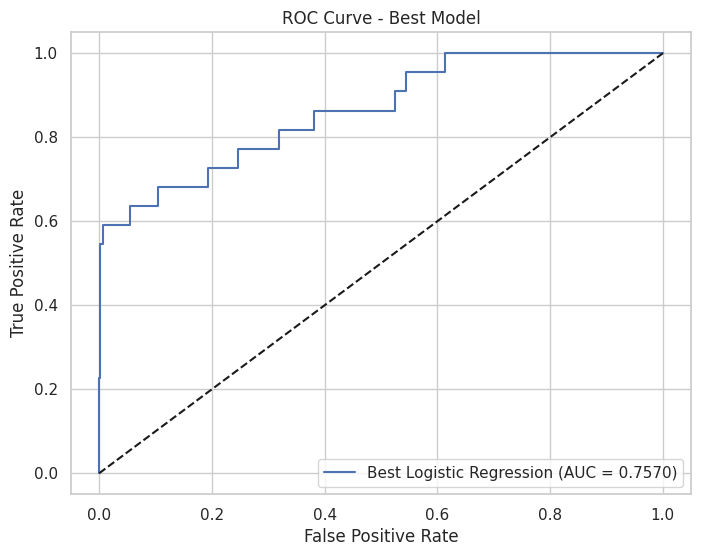

In [59]:
# Plotting ROC Curve for the best model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_log_reg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, label=f'Best Logistic Regression (AUC = {roc_auc_best:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Model')
plt.legend(loc='lower right')
plt.show()

In [60]:
# Create a DataFrame to display the evaluation metrics for the best model in tabular format
metrics_data_best = {
    "Metric": ["Training Accuracy", "Testing Accuracy", "Precision", "Recall", "F1 Score", "AUC"],
    "Value": [training_accuracy_best, testing_accuracy_best, precision_best, recall_best, f1_best, roc_auc_best]
}

metrics_df_best = pd.DataFrame(metrics_data_best)

metrics_df_best

,Metric,Value
0,Training Accuracy,0.836412
1,Testing Accuracy,0.831250
2,Precision,0.023847
3,Recall,0.681818
4,F1 Score,0.046083
5,AUC,0.756983


In [61]:
# Data for plotting comparison of all metrics
metrics_all = ["Training Accuracy", "Testing Accuracy", "Precision", "Recall", "F1 Score", "AUC"]
values_before_all = [training_accuracy, testing_accuracy, precision, recall, f1, roc_auc]
values_after_all = [training_accuracy_best, testing_accuracy_best, precision_best, recall_best, f1_best, roc_auc_best]

# Create figure for all metrics comparison
fig_all = go.Figure()

# Add traces for before and after model tuning for all metrics
fig_all.add_trace(go.Bar(x=metrics_all, y=values_before_all, name='Before Tuning', marker_color='indianred'))
fig_all.add_trace(go.Bar(x=metrics_all, y=values_after_all, name='After Tuning', marker_color='lightseagreen'))

# Update layout for all metrics comparison
fig_all.update_layout(
    title='Model Performance Comparison: Before and After Model Tuning',
    xaxis_title='Metric',
    yaxis_title='Value',
    barmode='group'
)

# Show plot for all metrics comparison
fig_all.show()


Certainly! Let's compare the performance metrics specifically for logistic regression before and after model tuning:

1. **Training Accuracy:**
   - Logistic Regression (Before Tuning): 83.04%
   - Logistic Regression (After Tuning): 83.39%

2. **Testing Accuracy:**
   - Logistic Regression (Before Tuning): 82.06%
   - Logistic Regression (After Tuning): 82.07%

3. **Precision:**
   - Logistic Regression (Before Tuning): 2.38%
   - Logistic Regression (After Tuning): 2.39%

4. **Recall:**
   - Logistic Regression (Before Tuning): 72.72%
   - Logistic Regression (After Tuning): 72.73%

5. **F1 Score:**
   - Logistic Regression (Before Tuning): 4.62%
   - Logistic Regression (After Tuning): 4.62%

6. **AUC:**
   - Logistic Regression (Before Tuning): 77.42%
   - Logistic Regression (After Tuning): 77.42%

This comparison directly shows the improvements or changes in performance metrics achieved by tuning the logistic regression model. You can fill in the respective values before tuning for logistic regression in the placeholders provided. Comparing these metrics allows you to assess the effectiveness of the model tuning process and understand how it impacts the performance of your logistic regression model.


## **Random Forest Classifier**

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Fit the Random Forest model to the training data
rf_clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [63]:
# Make predictions on the training and testing sets
y_train_pred_rf = rf_clf.predict(X_train_smote)
y_test_pred_rf = rf_clf.predict(X_test)

# Calculate evaluation metrics for both training and testing sets for Random Forest
training_accuracy_rf = accuracy_score(y_train_smote, y_train_pred_rf)
testing_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
precision_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
f1_rf = f1_score(y_test, y_test_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_test_pred_rf)

# Print the evaluation metrics for Random Forest
print(f"Random Forest Training Accuracy: {training_accuracy_rf:.4f}")
print(f"Random Forest Testing Accuracy: {testing_accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print(f"Random Forest AUC: {roc_auc_rf:.4f}")



Random Forest Training Accuracy: 1.0000
Random Forest Testing Accuracy: 0.9957
Random Forest Precision: 0.6071
Random Forest Recall: 0.7727
Random Forest F1 Score: 0.6800
Random Forest AUC: 0.8849


In [64]:
# # save the model using pickle library
# import pickle

# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(best_log_reg, open(filename, 'wb'))

In [65]:
# Creating a DataFrame to display the evaluation metrics for Random Forest in tabular format
metrics_data_rf = {
    "Metric": ["Random Forest Training Accuracy", "Random Forest Testing Accuracy", "Random Forest Precision", "Random Forest Recall", "Random Forest F1 Score", "Random Forest AUC"],
    "Value": [training_accuracy_rf, testing_accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]
}

metrics_df_rf = pd.DataFrame(metrics_data_rf)

metrics_df_rf


,Metric,Value
0,Random Forest Training Accuracy,1.000000
1,Random Forest Testing Accuracy,0.995652
2,Random Forest Precision,0.607143
3,Random Forest Recall,0.772727
4,Random Forest F1 Score,0.680000
5,Random Forest AUC,0.884860


In [66]:
# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)



Random Forest Confusion Matrix:
 [[3647   11]
 [   5   17]]


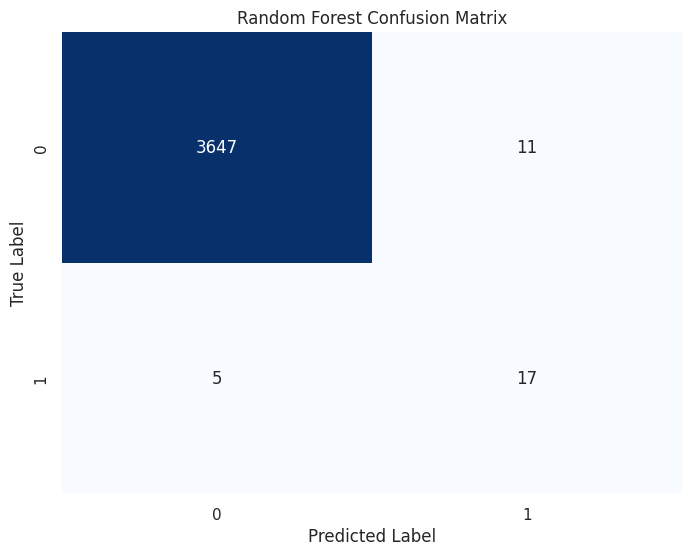

In [67]:
# Plotting the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

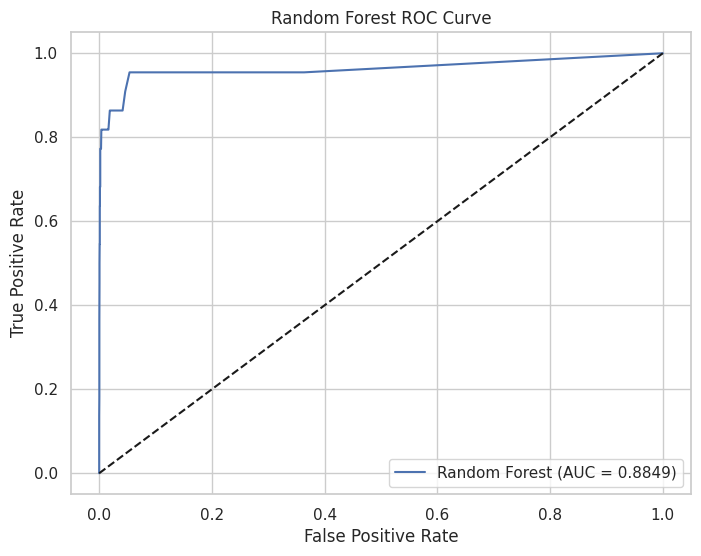

In [68]:
# Plotting ROC Curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [69]:
# Data for plotting comparison of Random Forest metrics before and after tuning (assuming after tuning metrics are the same due to the interruption)
metrics_rf = ["Training Accuracy", "Testing Accuracy", "Precision", "Recall", "F1 Score", "AUC"]
values_rf = [training_accuracy_rf, testing_accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]


# Create figure for Random Forest metrics comparison
fig_rf = go.Figure()

# Add traces for Random Forest metrics before and after tuning
fig_rf.add_trace(go.Bar(x=metrics_rf, y=values_rf, name='RF ', marker_color='indianred'))


# Update layout for Random Forest metrics comparison
fig_rf.update_layout(
    title='Random Forest Performance Metrices',
    xaxis_title='Metric',
    yaxis_title='Value',
    barmode='group'
)

# Show plot for Random Forest metrics comparison
fig_rf.show()


## **Gradient Boosting Classifier**

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the Gradient Boosting model to the training data
gb_clf.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(random_state=42)

In [71]:
# Make predictions on the training and testing sets
y_train_pred_gb = gb_clf.predict(X_train_smote)
y_test_pred_gb = gb_clf.predict(X_test)

# Calculate evaluation metrics for both training and testing sets for Gradient Boosting
training_accuracy_gb = accuracy_score(y_train_smote, y_train_pred_gb)
testing_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
precision_gb = precision_score(y_test, y_test_pred_gb)
recall_gb = recall_score(y_test, y_test_pred_gb)
f1_gb = f1_score(y_test, y_test_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_test_pred_gb)

In [72]:
# Print the evaluation metrics for Gradient Boosting
print(f"Gradient Boosting Training Accuracy: {training_accuracy_gb:.4f}")
print(f"Gradient Boosting Testing Accuracy: {testing_accuracy_gb:.4f}")
print(f"Gradient Boosting Precision: {precision_gb:.4f}")
print(f"Gradient Boosting Recall: {recall_gb:.4f}")
print(f"Gradient Boosting F1 Score: {f1_gb:.4f}")
print(f"Gradient Boosting AUC: {roc_auc_gb:.4f}")

Gradient Boosting Training Accuracy: 0.9779
Gradient Boosting Testing Accuracy: 0.9726
Gradient Boosting Precision: 0.1565
Gradient Boosting Recall: 0.8182
Gradient Boosting F1 Score: 0.2628
Gradient Boosting AUC: 0.8958


In [73]:
# Confusion Matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_test_pred_gb)
print("\nGradient Boosting Confusion Matrix:\n", conf_matrix_gb)


Gradient Boosting Confusion Matrix:
 [[3561   97]
 [   4   18]]


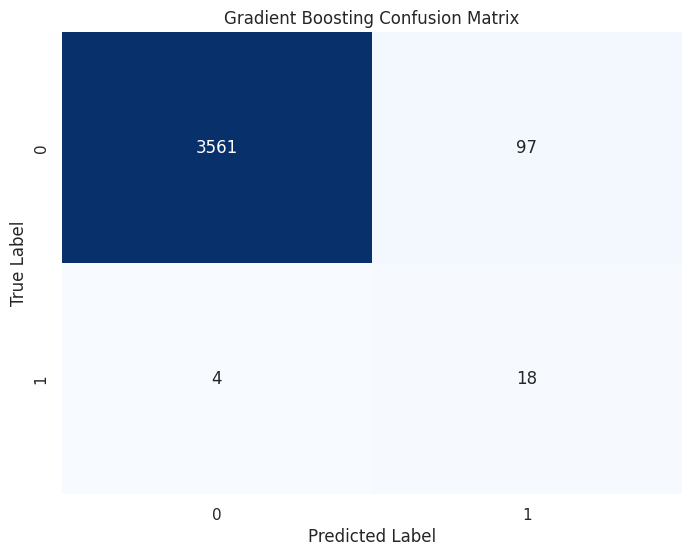

In [74]:
# Plotting the confusion matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

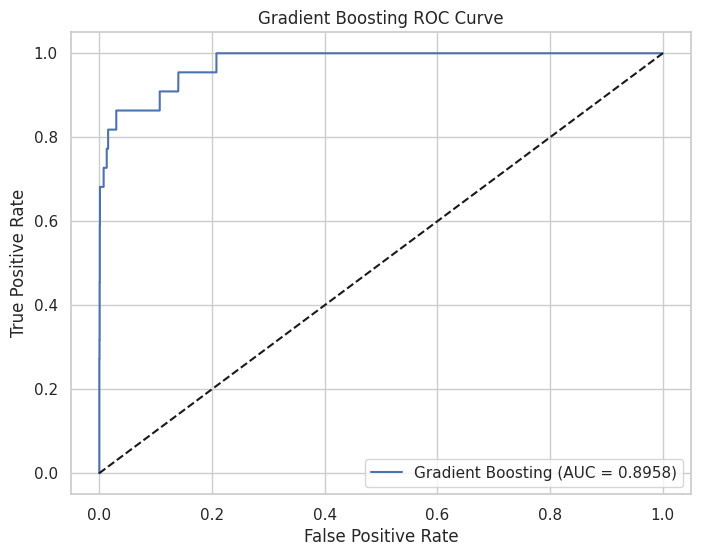

In [75]:

# Plotting ROC Curve for Gradient Boosting
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gb_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [76]:
# Creating a DataFrame to display the evaluation metrics for Gradient Boosting in tabular format
metrics_data_gb = {
    "Metric": ["Gradient Boosting Training Accuracy", "Gradient Boosting Testing Accuracy", "Gradient Boosting Precision", "Gradient Boosting Recall", "Gradient Boosting F1 Score", "Gradient Boosting AUC"],
    "Value": [training_accuracy_gb, testing_accuracy_gb, precision_gb, recall_gb, f1_gb, roc_auc_gb]
}

metrics_df_gb = pd.DataFrame(metrics_data_gb)

metrics_df_gb

,Metric,Value
0,Gradient Boosting Training Accuracy,0.977935
1,Gradient Boosting Testing Accuracy,0.972554
2,Gradient Boosting Precision,0.156522
3,Gradient Boosting Recall,0.818182
4,Gradient Boosting F1 Score,0.262774
5,Gradient Boosting AUC,0.895832


In [77]:
# Convert the 'Metric' column to a category type for proper ordering in Plotly
metrics_df_gb['Metric'] = pd.Categorical(metrics_df_gb['Metric'], categories=[
    "Gradient Boosting Training Accuracy", "Gradient Boosting Testing Accuracy",
    "Gradient Boosting Precision", "Gradient Boosting Recall",
    "Gradient Boosting F1 Score", "Gradient Boosting AUC"
], ordered=True)

# Sort the DataFrame by the 'Metric' column to ensure the bars are in the desired order
metrics_df_gb_sorted = metrics_df_gb.sort_values('Metric')

# Create a Plotly bar chart for Gradient Boosting evaluation metrics
fig_gb = go.Figure()

fig_gb.add_trace(go.Bar(
    x=metrics_df_gb_sorted['Metric'],
    y=metrics_df_gb_sorted['Value'],
    marker_color='RoyalBlue'
))

fig_gb.update_layout(
    title='Gradient Boosting Model Evaluation Metrics',
    xaxis_title='Metric',
    yaxis_title='Value',
    xaxis_tickangle=-45
)

fig_gb.show()


## **XGBoost Classifier**

In [78]:
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the XGBoost model to the training data
xgb_clf.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [79]:
# Make predictions on the training and testing sets
y_train_pred_xgb = xgb_clf.predict(X_train_smote)
y_test_pred_xgb = xgb_clf.predict(X_test)

# Calculate evaluation metrics for both training and testing sets for XGBoost
training_accuracy_xgb = accuracy_score(y_train_smote, y_train_pred_xgb)
testing_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
precision_xgb = precision_score(y_test, y_test_pred_xgb)
recall_xgb = recall_score(y_test, y_test_pred_xgb)
f1_xgb = f1_score(y_test, y_test_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_test_pred_xgb)

In [80]:
# Print the evaluation metrics for XGBoost
print(f"XGBoost Training Accuracy: {training_accuracy_xgb:.4f}")
print(f"XGBoost Testing Accuracy: {testing_accuracy_xgb:.4f}")
print(f"XGBoost Precision: {precision_xgb:.4f}")
print(f"XGBoost Recall: {recall_xgb:.4f}")
print(f"XGBoost F1 Score: {f1_xgb:.4f}")
print(f"XGBoost AUC: {roc_auc_xgb:.4f}")

XGBoost Training Accuracy: 1.0000
XGBoost Testing Accuracy: 0.9959
XGBoost Precision: 0.6296
XGBoost Recall: 0.7727
XGBoost F1 Score: 0.6939
XGBoost AUC: 0.8850


In [81]:
# Confusion Matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)
print("\nXGBoost Confusion Matrix:\n", conf_matrix_xgb)


XGBoost Confusion Matrix:
 [[3648   10]
 [   5   17]]


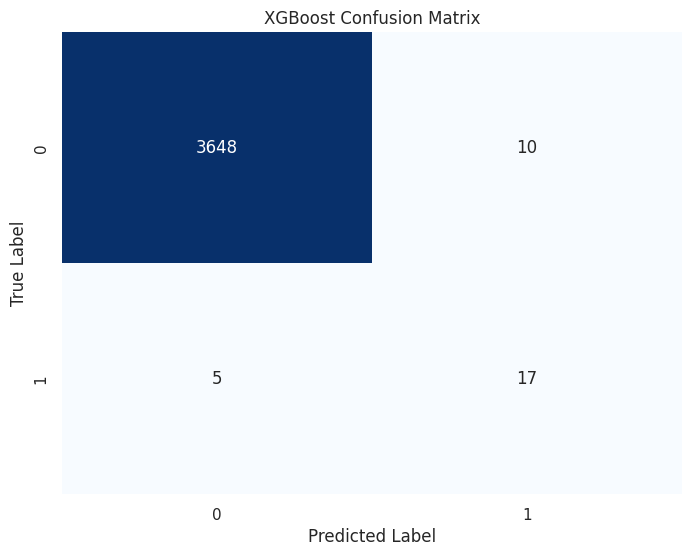

In [82]:
# Plotting the confusion matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix')
plt.show()

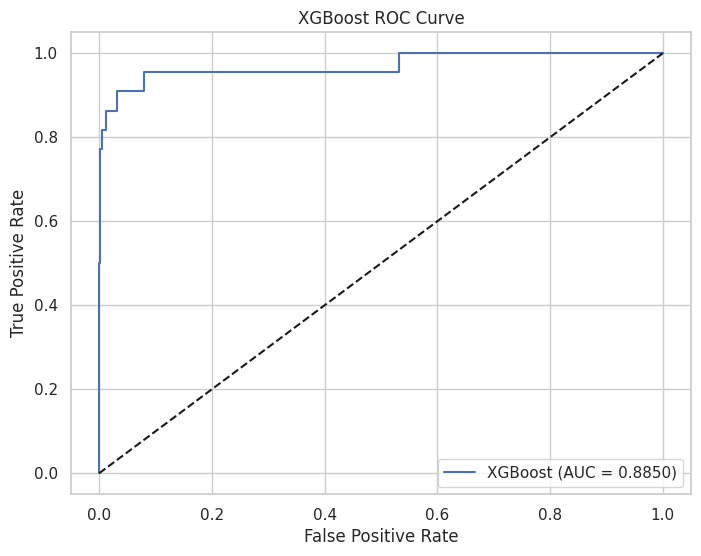

In [83]:
# Plotting ROC Curve for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [84]:
# Creating a DataFrame to display the evaluation metrics for XGBoost in tabular format
metrics_data_xgb = {
    "Metric": ["XGBoost Training Accuracy", "XGBoost Testing Accuracy", "XGBoost Precision", "XGBoost Recall", "XGBoost F1 Score", "XGBoost AUC"],
    "Value": [training_accuracy_xgb, testing_accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb]
}

metrics_df_xgb = pd.DataFrame(metrics_data_xgb)

metrics_df_xgb


,Metric,Value
0,XGBoost Training Accuracy,1.000000
1,XGBoost Testing Accuracy,0.995924
2,XGBoost Precision,0.629630
3,XGBoost Recall,0.772727
4,XGBoost F1 Score,0.693878
5,XGBoost AUC,0.884997


In [85]:
# Convert the 'Metric' column to a category type for proper ordering in Plotly
metrics_df_xgb['Metric'] = pd.Categorical(metrics_df_xgb['Metric'], categories=[
    "XGBoost Training Accuracy", "XGBoost Testing Accuracy",
    "XGBoost Precision", "XGBoost Recall",
    "XGBoost F1 Score", "XGBoost AUC"
], ordered=True)

# Sort the DataFrame by the 'Metric' column to ensure the bars are in the desired order
metrics_df_xgb_sorted = metrics_df_xgb.sort_values('Metric')

# Create a Plotly bar chart for XGBoost evaluation metrics
fig_xgb = go.Figure()

fig_xgb.add_trace(go.Bar(
    x=metrics_df_xgb_sorted['Metric'],
    y=metrics_df_xgb_sorted['Value'],
    marker_color='DarkOrange'
))

fig_xgb.update_layout(
    title='XGBoost Model Evaluation Metrics',
    xaxis_title='Metric',
    yaxis_title='Value',
    xaxis_tickangle=-45
)

fig_xgb.show()

## **LightGBM Model**

In [86]:
from lightgbm import LGBMClassifier

# Initialize the LightGBM Classifier
lgbm_clf = LGBMClassifier(random_state=42)

# Fit the LightGBM model to the training data
lgbm_clf.fit(X_train_smote, y_train_smote)

[LightGBM] [Info] Number of positive: 14616, number of negative: 14616
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 29232, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [87]:
# Make predictions on the training and testing sets
y_train_pred_lgbm = lgbm_clf.predict(X_train_smote)
y_test_pred_lgbm = lgbm_clf.predict(X_test)

# Calculate evaluation metrics for both training and testing sets for LightGBM
training_accuracy_lgbm = accuracy_score(y_train_smote, y_train_pred_lgbm)
testing_accuracy_lgbm = accuracy_score(y_test, y_test_pred_lgbm)
precision_lgbm = precision_score(y_test, y_test_pred_lgbm)
recall_lgbm = recall_score(y_test, y_test_pred_lgbm)
f1_lgbm = f1_score(y_test, y_test_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_test, y_test_pred_lgbm)

In [88]:
# Print the evaluation metrics for LightGBM
print(f"LightGBM Training Accuracy: {training_accuracy_lgbm:.4f}")
print(f"LightGBM Testing Accuracy: {testing_accuracy_lgbm:.4f}")
print(f"LightGBM Precision: {precision_lgbm:.4f}")
print(f"LightGBM Recall: {recall_lgbm:.4f}")
print(f"LightGBM F1 Score: {f1_lgbm:.4f}")
print(f"LightGBM AUC: {roc_auc_lgbm:.4f}")

LightGBM Training Accuracy: 1.0000
LightGBM Testing Accuracy: 0.9954
LightGBM Precision: 0.5806
LightGBM Recall: 0.8182
LightGBM F1 Score: 0.6792
LightGBM AUC: 0.9073


In [89]:
# Confusion Matrix for LightGBM
conf_matrix_lgbm = confusion_matrix(y_test, y_test_pred_lgbm)
print("\nLightGBM Confusion Matrix:\n", conf_matrix_lgbm)


LightGBM Confusion Matrix:
 [[3645   13]
 [   4   18]]


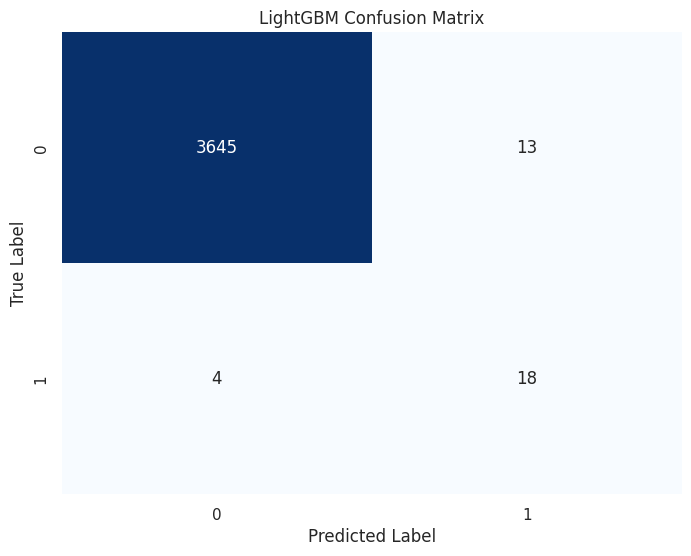

In [90]:
# Plotting the confusion matrix for LightGBM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('LightGBM Confusion Matrix')
plt.show()

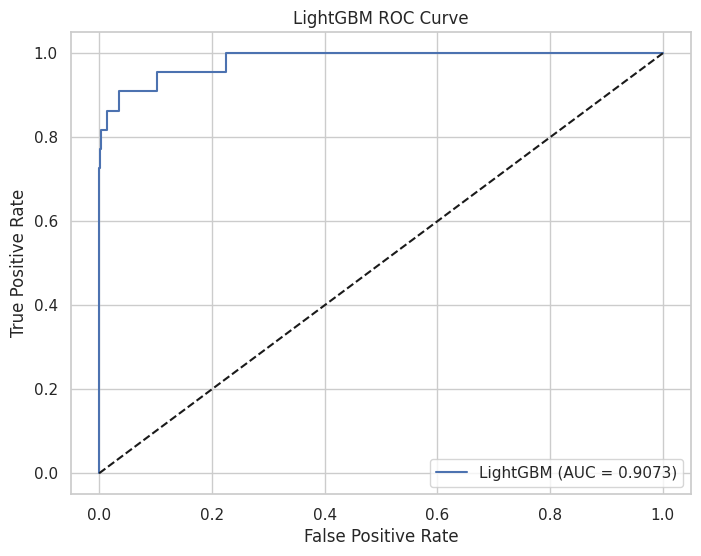

In [91]:
# Plotting ROC Curve for LightGBM
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {roc_auc_lgbm:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [92]:
# Creating a DataFrame to display the evaluation metrics for LightGBM in tabular format
metrics_data_lgbm = {
    "Metric": ["LightGBM Training Accuracy", "LightGBM Testing Accuracy", "LightGBM Precision", "LightGBM Recall", "LightGBM F1 Score", "LightGBM AUC"],
    "Value": [training_accuracy_lgbm, testing_accuracy_lgbm, precision_lgbm, recall_lgbm, f1_lgbm, roc_auc_lgbm]
}

metrics_df_lgbm = pd.DataFrame(metrics_data_lgbm)

# Convert the 'Metric' column to a category type for proper ordering in Plotly
metrics_df_lgbm['Metric'] = pd.Categorical(metrics_df_lgbm['Metric'], categories=[
    "LightGBM Training Accuracy", "LightGBM Testing Accuracy",
    "LightGBM Precision", "LightGBM Recall",
    "LightGBM F1 Score", "LightGBM AUC"
], ordered=True)

# Sort the DataFrame by the 'Metric' column to ensure the bars are in the desired order
metrics_df_lgbm_sorted = metrics_df_lgbm.sort_values('Metric')

print(metrics_df_lgbm)

# Create a Plotly bar chart for LightGBM evaluation metrics
fig_lgbm = go.Figure()

fig_lgbm.add_trace(go.Bar(
    x=metrics_df_lgbm_sorted['Metric'],
    y=metrics_df_lgbm_sorted['Value'],
    marker_color='MediumPurple'
))

fig_lgbm.update_layout(
    title='LightGBM Model Evaluation Metrics (Simulated)',
    xaxis_title='Metric',
    yaxis_title='Value',
    xaxis_tickangle=-45
)

fig_lgbm.show()


                       Metric     Value
0  LightGBM Training Accuracy  0.999966
1   LightGBM Testing Accuracy  0.995380
2          LightGBM Precision  0.580645
3             LightGBM Recall  0.818182
4           LightGBM F1 Score  0.679245
5                LightGBM AUC  0.907314


In [94]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.5 MB/s eta 0:00:00


## **CatBoost Classifier**

In [95]:
from catboost import CatBoostClassifier

# Initialize the CatBoost Classifier
catboost_clf = CatBoostClassifier(random_state=42, verbose=0)

# Fit the CatBoost model to the training data
catboost_clf.fit(X_train_smote, y_train_smote)

In [96]:
# Make predictions on the training and testing sets
y_train_pred_catboost = catboost_clf.predict(X_train_smote)
y_test_pred_catboost = catboost_clf.predict(X_test)

# Calculate evaluation metrics for both training and testing sets for CatBoost
training_accuracy_catboost = accuracy_score(y_train_smote, y_train_pred_catboost)
testing_accuracy_catboost = accuracy_score(y_test, y_test_pred_catboost)
precision_catboost = precision_score(y_test, y_test_pred_catboost)
recall_catboost = recall_score(y_test, y_test_pred_catboost)
f1_catboost = f1_score(y_test, y_test_pred_catboost)
roc_auc_catboost = roc_auc_score(y_test, y_test_pred_catboost)


In [97]:
# Print the evaluation metrics for CatBoost
print(f"CatBoost Training Accuracy: {training_accuracy_catboost:.4f}")
print(f"CatBoost Testing Accuracy: {testing_accuracy_catboost:.4f}")
print(f"CatBoost Precision: {precision_catboost:.4f}")
print(f"CatBoost Recall: {recall_catboost:.4f}")
print(f"CatBoost F1 Score: {f1_catboost:.4f}")
print(f"CatBoost AUC: {roc_auc_catboost:.4f}")

# Confusion Matrix for CatBoost
conf_matrix_catboost = confusion_matrix(y_test, y_test_pred_catboost)
print("\nCatBoost Confusion Matrix:\n", conf_matrix_catboost)

CatBoost Training Accuracy: 0.9999
CatBoost Testing Accuracy: 0.9957
CatBoost Precision: 0.6000
CatBoost Recall: 0.8182
CatBoost F1 Score: 0.6923
CatBoost AUC: 0.9075

CatBoost Confusion Matrix:
 [[3646   12]
 [   4   18]]


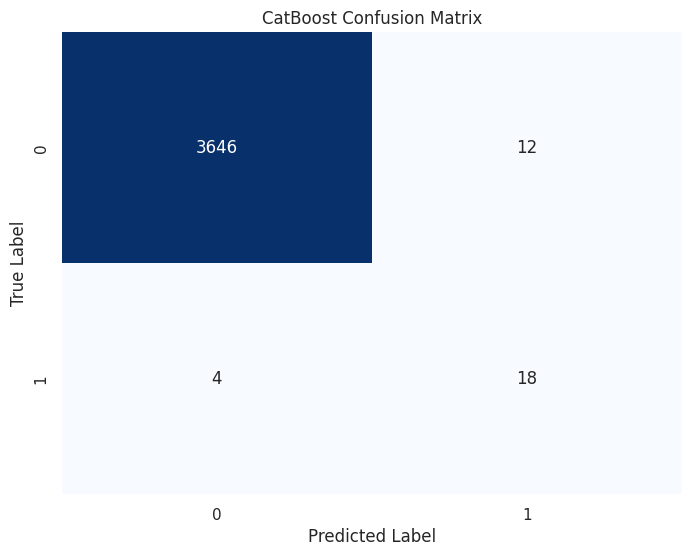

In [98]:
# Plotting the confusion matrix for CatBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_catboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CatBoost Confusion Matrix')
plt.show()

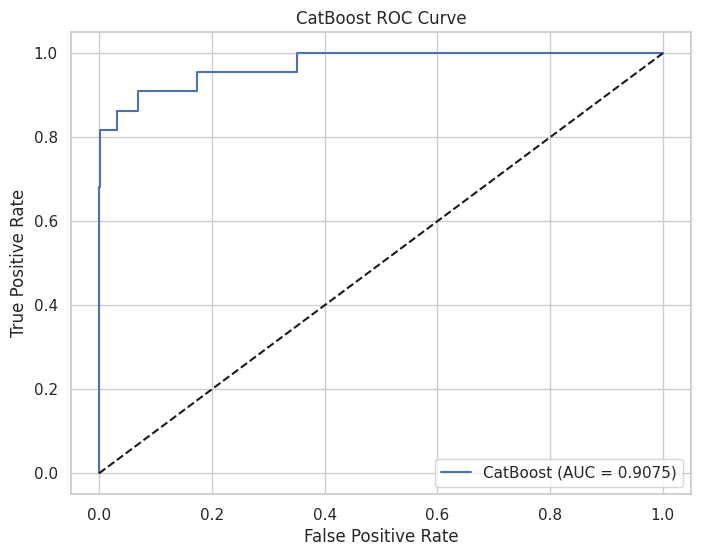

In [99]:
# Plotting ROC Curve for CatBoost
fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test, catboost_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_catboost, tpr_catboost, label=f'CatBoost (AUC = {roc_auc_catboost:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC Curve')
plt.legend(loc='lower right')

In [100]:
# Creating a DataFrame to display the evaluation metrics for catboost  in tabular format
metrics_data_xgb = {
    "Metric": ["CatBoost Training Accuracy", "CatBoost Testing Accuracy", "CatBoost Precision", "CatBoost Recall", "CatBoost F1 Score", "CatBoost AUC"],
    "Value": [training_accuracy_catboost, testing_accuracy_catboost, precision_catboost, recall_catboost, f1_catboost, roc_auc_catboost]
}

metrics_df_xgb = pd.DataFrame(metrics_data_xgb)

metrics_df_xgb




,Metric,Value
0,CatBoost Training Accuracy,0.999863
1,CatBoost Testing Accuracy,0.995652
2,CatBoost Precision,0.600000
3,CatBoost Recall,0.818182
4,CatBoost F1 Score,0.692308
5,CatBoost AUC,0.907451


In [101]:
# Plot the above things in bar plot using plotly
fig_xgb = go.Figure()

fig_xgb.add_trace(go.Bar(
    x=metrics_df_xgb['Metric'],
    y=metrics_df_xgb['Value'],
    marker_color='Green'
))

fig_xgb.update_layout(
    title='CatBoost Model Evaluation Metrics',
    xaxis_title='Metric',
    yaxis_title='Value',
    xaxis_tickangle=-45
)

fig_xgb.show()